# Pre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/tarak/Players-Block-20211116T025030Z-001/Players-Block/GNN/data/
! ls

/content/drive/.shortcut-targets-by-id/1MeacoHD16_nfxfWKec4Nch65B3Nxp4K-/tarak/Players-Block-20211116T025030Z-001/Players-Block/GNN/data
 Competes_in_edges.csv
 Comp_season_nodes.csv
 dataset_lineup_6feat_no_agg_box_score.csv
 dataset_lineup_agg_box_score_features.csv
 Field_player_nodes.csv
 field_players_plus_features.csv
 GK_nodes.csv
 gnn_data.docx
 gnn_data.pdf
 goal_keepers_plus_features.csv
 Hosts_edges.csv
 Manager_nodes.csv
 Manages_edges.csv
 matches.csv
 matches_lineup_6feat_no_agg_box_score.csv
 matches_lineup_agg_box_score_features.csv
 player_6feat_no_agg_box_score.csv
 Plays_for_edges.csv
 Plays_with_edges.csv
 SetAggModel.pth
'Team_nodes(1).csv'
 Team_nodes.csv
 team_nodes_plus_features.csv
 team_players_game_6feat_no_agg_box_score.csv
 team_players_game_agg_box_score_features.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
! pip install pandasql
import pandasql as ps
import seaborn as sns
from jenkspy import jenks_breaks

ModuleNotFoundError: ignored

# S

In [ ]:
pd.read_csv('field_players_plus_features.csv')

# Part 1

## Section a

### Association Football is the world's most popular sport. Each match is played between 2 teams of 11 players each. Teams try to score goals and the team scoring the more goals wins. If both teams have the same number of goals scored, the result will be a tie. The better the players of a team, the higher the chances of that team winning a match. In every match, there are events of player actions, either positive including but not limited to scoring a goal, successfully passing the ball and intercepting the ball, or negative, for instance scoring an own goal, getting a red or yellow card and etc. In addition to players' merit and quality playing, other factors such as match context, weather conditions, coaching team and players' experience, to name a few, as well as pure luck play an enormous role in determining the outcome of a match.
### Each match is held at a stadium, usually filled with cheering audience applauding their favorite team. The team playing at their home stadium have an advantage since the audience will have a supporting effect and the boost in morale of the home team players will cause the home team to have a higher chance of winning.
### Due to the sport's nature, predicting the outcome of a match is rather difficult. Moreover, in contrast to traditional ML problems where the output is a function of an input vector, the outcome of a match is a function of two input vectors, the home and the away feature vectors and if the players' features are to be modeled as well, there will be two sets of features for the home and the away teams. Since each team is represented as a set of players and sets are permutation-invariant, any modeling will also have to be permutation invariant.

## Section b

### Prior approaches to predict the outcome of a match are mostly statistical methods originating from zero-sum games such as chess prediction. These approaches mostly teams' lineup completely and only model teams, turning a blind eye to the effect of players inside or outside the field. 
### ELO rating system is one popular method that tries to calculate the relative skill level of the two teams competing in a match. A set of fixed mathematical formulas are introduced in this approach which aim to rate teams based on their previous performances. If a team has won more matches, their rating is higher. The ELO rating system's formulas have a number of hyperparameters that could be tuned for better results.
### Other approaches combine both ML methods and statistical formulas utilizing both hidden representations and fixed mathematical relations.
### Blade Chest model is one example of this approach. Each team has a vector of features obtained prior to a match. Two feed forward encoders are used to attain two hidden vectors for a team. One being the blade vector representing the offensive strategy and strength of each team and the other being the chest vector representing the defensive strategy and strength. Using a mathematical operation as the decoder, the match-up score is calculated as:
??????????
score = (blade of team a).(chest of team b) - (blade of team b).(chest of team a)
### Using thresholds, this score can be binned into regions where higher scores correspond to the winnig territory for team a and lower scores correspond to the winning territory for team b and a middle ground corresponds to ties.
### Recently and with the rising popularity of graph models, a graph based model has been used to create a message-passing network of team nodes. This model is transductive and each team has a node in the network and the edges are of types win and lose with higher edge weights corresponding to more recent matches. This weighting of edges is through fixed mathematical formulas and aims at favoring more recent match links.

## Section c

### Our approach aims to represent each team competing in a match as a multi-set of 11 players comprising the lineup of that team. The problem will be a classification task whose target variable will be a vector of 3 possible outcomes of a match, home win, home loss and tie. The target variable will be a fuction of two multi-sets home and away, each containing 11 players.
### Players have two sets of measures, post-game and pre-game. Pre-game measures are attributes such as market value, age and video game rating, conducted by video game companies such as EA and Konami. Post-game measures such as goals scored or minutes played are not accessible prior to the match.
### Post-game measures contain a tremendous amount of information in regard to individual players. Our idea is to utilize these information through pre-game aggregates of these post-game measures. In other words, for each player, a new set of aggregate pre-game attributes are derived from the post-game measures of the last n games, n can be tuned. As a concrete example, each player's total number of successful passes in the last 3 matches is an aggregate pre-game attribute.
### One key note to keep in mind is that the nature of this task is both dependent and independent of order. At intra-team level, there is no fixed point of reference and hence each team is represented as a multi-set and any subsequent modeling need to preserve this permutaion invariace. In contrast, at inter-team level, for the home team advantage, order is meaningful and the home team's position need be fixed at the time of modeling.
### As an increment to the universal approximation theorem, the injective multi-set theorme is utilized to map an injective function from the set of players to their team. This approach will be used to represent each team as a multi-set of its players.
### Each team's multi-set is turned into a vector injectively with the following formula:
### koon below:
team = MLP_team(sigma(MLP_player(player)))
### Each MLP is a neural fully connected network with at least one hidden layer. After obtainging each team's hidden representation, the vecotr of both teams can be fed into another MLP whose output layer is the target variable of the match outcome

# Part 2

## Preface

### The data for this task is not in the form of traditionl record data similar to that of the relational databases. The data is at its high level, in the form of graph. Each match is represented with a subgraph containing nodes for teams and players competing in that match. The graph is therefore a spatial graph. Nodes of the same entities are also linked together through time and adds a temporal aspect to the graph as well. The concrete data is stored in the form of record data, each record of the data corresponding to a particular node or edge. Node types include team and player and edge types includ hosts, played for, before and after to name a few.

## Section a

### Field players and goalkeepers are the input to our problem. 3 attributes for field players including goals scored, market value and video game rating plus 1 attribute of saves for goalkeepers are used for this section.

In [ ]:
# Loading
player_nodes = pd.read_csv('Field_player_nodes.csv')
gk_nodes = pd.read_csv('GK_nodes.csv')
player_attrs = ['postGame_goals', 'preGame_marketValueMilEuro', 'preGame_overall']
gk_attrs = ['postGame_save']

In [ ]:
# Z-Score
for attr in player_attrs + gk_attrs:
  try:
    data = player_nodes.loc[:, [attr]]
  except:
    data = gk_nodes.loc[:, [attr]]
  z_score = (data - data.mean()) / data.std()
  is_outlier = (z_score > 3) | (z_score < -3)
  is_outlier = is_outlier.values.reshape(-1)
  outlier_indcs = np.nonzero(is_outlier)

  outlier = data.loc[outlier_indcs]
  print(outlier.sort_values(by=attr))
  print('-' * 40)

       postGame_goals
37467               2
50688               2
50757               2
50877               2
51107               2
...               ...
67259               4
47229               4
27278               4
26430               4
18678               5

[944 rows x 1 columns]
----------------------------------------
       preGame_marketValueMilEuro
36                           51.5
41756                        51.5
41713                        51.5
18798                        51.5
41603                        51.5
...                           ...
65458                       525.0
67300                       525.0
69766                       525.0
69134                       525.0
65649                       525.0

[1581 rows x 1 columns]
----------------------------------------
       preGame_overall
66768             48.0
64234             50.0
51624             50.0
58194             50.0
53924             50.0
...                ...
42746             94.0
42882        

In [ ]:
# IQR
for attr in player_attrs + gk_attrs:
  try:
    data = player_nodes.loc[:, [attr]]
  except:
    data = gk_nodes.loc[:, [attr]]
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr
  is_outlier = (data.values > upper.values) | (data.values < lower.values)
  is_outlier = is_outlier.reshape(-1)
  outlier_indcs = np.nonzero(is_outlier)

  outlier = data.loc[outlier_indcs]
  print(outlier.sort_values(by=attr))
  print('-' * 40)

       postGame_goals
39708               1
51438               1
51409               1
51407               1
51406               1
...               ...
27278               4
47229               4
49567               4
67259               4
18678               5

[8211 rows x 1 columns]
----------------------------------------
       preGame_marketValueMilEuro
44571                        24.0
54333                        24.0
6470                         24.0
54515                        24.0
28821                        24.0
...                           ...
67300                       525.0
69313                       525.0
67346                       525.0
69766                       525.0
65458                       525.0

[6949 rows x 1 columns]
----------------------------------------
       preGame_overall
66768             48.0
58194             50.0
64234             50.0
51624             50.0
62214             50.0
...                ...
44999             94.0
38435       

## Section b

### Numerical non-binary fields have been chosen on which 6 candidate transfomrs including 3 methods of log, square root and inverse square root, each with 2 added values of 1 and 0.1, were performed and the approach with the least skewness were selected and finally all values were normalized with the z-score standardization method. Since log and inverse square root cannot accept negative or zero values, all data are added with their respective minimum and then again with either 1 or 0.1.

In [ ]:
gk_nodes.columns

Index(['player_optaId', 'postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'playerId', 'name', 'preGame_overall',
       'preGame_potential', 'preGame_marketValueMilEuro',
       'preGame_preferredFoot', 'preGame_ageDays', 'preGame_xgpm',
       'preGame_xppm', 'postGame_error', 'postGame_clearance',
       'postGame_index', 'postGame_pickUp', 'postGame_punch', 'postGame_save',
       'gameId', 'teamId', 'teamName', 'gameDate', 'nodeId', 'nodeName'],
      dtype='object')

In [ ]:
player_nodes.describe()

In [ ]:
gk_nodes['preGame_line']

0       1
1       1
2       1
3       1
4       1
       ..
8003    1
8004    1
8005    1
8006    1
8007    1
Name: preGame_line, Length: 8008, dtype: int64

In [ ]:

numerical_fp = ['postGame_minPlayed',
  'preGame_overall', 'preGame_potential', 'preGame_marketValueMilEuro',
  'preGame_ageDays', 'postGame_error',
  'postGame_clearance', 'postGame_index', 'postGame_shots',
  'postGame_shots_on_target', 'postGame_shots_left_foot',
  'postGame_shots_right_foot', 'postGame_shots_head',
  'postGame_shots_other', 'postGame_goals', 'postGame_goals_left_foot',
  'postGame_goals_right_foot', 'postGame_goals_head',
  'postGame_goals_other', 'postGame_xG', 'postGame_cross',
  'postGame_cross_success', 'postGame_pass', 'postGame_pass_success',
  'postGame_pass_final_third', 'postGame_pass_final_third_success',
  'postGame_pass_forward', 'postGame_pass_forward_success',
  'postGame_dribble', 'postGame_dribble_success', 'postGame_tackle',
  'postGame_tackle_success', 'postGame_interception',
  'postGame_challenge', 'postGame_ball_recovery', 'postGame_ball_lost',
  'postGame_key_pass', 'preGame_xgpm', 'preGame_xppm',]

In [ ]:
numerical_gk = ['postGame_minPlayed', 
      'preGame_overall',
       'preGame_potential', 'preGame_marketValueMilEuro',
       'preGame_ageDays', 'preGame_xgpm',
       'preGame_xppm', 'postGame_error', 'postGame_clearance',
       'postGame_index', 'postGame_pickUp', 'postGame_punch', 'postGame_save']

In [ ]:
# Field Players
for attr in numerical_fp:
  choices = []
  values = []
  data = player_nodes.loc[:, [attr]]
  min = data.min().item()
  
  plus_one_log_transformed = pd.DataFrame(np.log(data.values + 1 + min))
  plus_p1_log_transformed = pd.DataFrame(np.log(data.values + 0.1 + min))
  plus_one_sqrt_transformed = pd.DataFrame(np.log(data.values + 1 + min))
  plus_p1_sqrt_transformed = pd.DataFrame(np.log(data.values + 0.1 + min))
  plus_one_inv_sqrt_transformed = pd.DataFrame(np.log(data.values + 1 + min))
  plus_p1_inv_sqrt_transformed = pd.DataFrame(np.log(data.values + 0.1 + min))

  values.append(data)
  values.append(plus_one_log_transformed)
  values.append(plus_p1_log_transformed)
  values.append(plus_one_sqrt_transformed)
  values.append(plus_p1_sqrt_transformed)
  values.append(plus_one_inv_sqrt_transformed)
  values.append(plus_p1_inv_sqrt_transformed)

  choices.append(data.skew())
  choices.append(plus_one_log_transformed.skew())
  choices.append(plus_p1_log_transformed.skew())
  choices.append(plus_one_sqrt_transformed.skew())
  choices.append(plus_p1_sqrt_transformed.skew())
  choices.append(plus_one_inv_sqrt_transformed.skew())
  choices.append(plus_p1_inv_sqrt_transformed.skew())

  best_choice = np.abs(np.array(choices)).argmin()
  sym = values[best_choice]
  normal = (sym / sym.mean()) / sym.std()
  print(attr)
  print(f'Original data skewness: {data.skew().round(3).item()}')
  print(f'After transformation if necessary data skewness: {normal.skew().round(3).item()}')
  
  print('-' * 40)

postGame_minPlayed
Original data skewness: -2.026
After transformation if necessary data skewness: -2.026
----------------------------------------
preGame_overall
Original data skewness: 0.11
After transformation if necessary data skewness: -0.053
----------------------------------------
preGame_potential
Original data skewness: 0.094
After transformation if necessary data skewness: -0.007
----------------------------------------
preGame_marketValueMilEuro
Original data skewness: 9.837
After transformation if necessary data skewness: 0.104
----------------------------------------
preGame_ageDays
Original data skewness: 0.28
After transformation if necessary data skewness: 0.067
----------------------------------------
postGame_error
Original data skewness: 4.578
After transformation if necessary data skewness: -4.176
----------------------------------------
postGame_clearance
Original data skewness: 1.777
After transformation if necessary data skewness: 0.315
--------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


postGame_shots_on_target
Original data skewness: 1.948
After transformation if necessary data skewness: -0.512
----------------------------------------
postGame_shots_left_foot
Original data skewness: 3.032
After transformation if necessary data skewness: -1.329
----------------------------------------
postGame_shots_right_foot
Original data skewness: 2.198
After transformation if necessary data skewness: -0.756
----------------------------------------
postGame_shots_head
Original data skewness: 3.156
After transformation if necessary data skewness: -1.941
----------------------------------------
postGame_shots_other
Original data skewness: 15.027
After transformation if necessary data skewness: 15.027
----------------------------------------
postGame_goals
Original data skewness: 3.472
After transformation if necessary data skewness: -2.672
----------------------------------------
postGame_goals_left_foot
Original data skewness: 6.183
After transformation if necessary data skewness: -

In [ ]:
# Goalkeepers
for attr in numerical_gk:
  choices = []
  values = []
  data = gk_nodes.loc[:, [attr]]
  min = data.min().item()
  
  plus_one_log_transformed = pd.DataFrame(np.log(data.values + 1 + min))
  plus_p1_log_transformed = pd.DataFrame(np.log(data.values + 0.1 + min))
  plus_one_sqrt_transformed = pd.DataFrame(np.log(data.values + 1 + min))
  plus_p1_sqrt_transformed = pd.DataFrame(np.log(data.values + 0.1 + min))
  plus_one_inv_sqrt_transformed = pd.DataFrame(np.log(data.values + 1 + min))
  plus_p1_inv_sqrt_transformed = pd.DataFrame(np.log(data.values + 0.1 + min))

  values.append(data)
  values.append(plus_one_log_transformed)
  values.append(plus_p1_log_transformed)
  values.append(plus_one_sqrt_transformed)
  values.append(plus_p1_sqrt_transformed)
  values.append(plus_one_inv_sqrt_transformed)
  values.append(plus_p1_inv_sqrt_transformed)

  choices.append(data.skew())
  choices.append(plus_one_log_transformed.skew())
  choices.append(plus_p1_log_transformed.skew())
  choices.append(plus_one_sqrt_transformed.skew())
  choices.append(plus_p1_sqrt_transformed.skew())
  choices.append(plus_one_inv_sqrt_transformed.skew())
  choices.append(plus_p1_inv_sqrt_transformed.skew())

  best_choice = np.abs(np.array(choices)).argmin()
  sym = values[best_choice]
  normal = (sym / sym.mean()) / sym.std()
  print(attr)
  print(f'Original data skewness: {data.skew().round(3).item()}')
  print(f'After transformation if necessary data skewness: {normal.skew().round(3).item()}')
  print('-' * 40)

postGame_minPlayed
Original data skewness: -9.758
After transformation if necessary data skewness: -9.758
----------------------------------------
preGame_overall
Original data skewness: 0.079
After transformation if necessary data skewness: -0.042
----------------------------------------
preGame_potential
Original data skewness: 0.101
After transformation if necessary data skewness: -0.004
----------------------------------------
preGame_marketValueMilEuro
Original data skewness: 3.05
After transformation if necessary data skewness: 0.173
----------------------------------------
preGame_ageDays
Original data skewness: 0.219
After transformation if necessary data skewness: 0.022
----------------------------------------
preGame_xgpm
Original data skewness: 0.418
After transformation if necessary data skewness: -0.313
----------------------------------------
preGame_xppm
Original data skewness: 0.493
After transformation if necessary data skewness: 0.493
---------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


After transformation if necessary data skewness: -2.859
----------------------------------------
postGame_clearance
Original data skewness: 1.817
After transformation if necessary data skewness: -0.492
----------------------------------------
postGame_index
Original data skewness: 0.725
After transformation if necessary data skewness: 0.725
----------------------------------------
postGame_pickUp
Original data skewness: 0.622
After transformation if necessary data skewness: 0.622
----------------------------------------
postGame_punch
Original data skewness: 1.902
After transformation if necessary data skewness: -0.928
----------------------------------------
postGame_save
Original data skewness: 0.916
After transformation if necessary data skewness: -0.509
----------------------------------------


## Section c

### Non-numeric categorical attributes are outnumbered by numerical attributes and are limited to 'preGame_side', 'preGame_line', 'preGame_position', 'preGame_preferredFoot', of which only 'preGame_position' could be reclassified. As a concrete example, 'FW','FWL' and 'FWR' could all be reclassified as 'F', short for 'Forward'.

In [ ]:
player_nodes.columns

Index(['player_optaId', 'postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'playerId', 'name', 'postGame_positions',
       'preGame_overall', 'preGame_potential', 'preGame_marketValueMilEuro',
       'preGame_preferredFoot', 'preGame_ageDays', 'postGame_error',
       'postGame_clearance', 'postGame_index', 'postGame_shots',
       'postGame_shots_on_target', 'postGame_shots_left_foot',
       'postGame_shots_right_foot', 'postGame_shots_head',
       'postGame_shots_other', 'postGame_goals', 'postGame_goals_left_foot',
       'postGame_goals_right_foot', 'postGame_goals_head',
       'postGame_goals_other', 'postGame_xG', 'postGame_cross',
       'postGame_cross_success', 'postGame_pass', 'postGame_pass_success',
       'postGame_pass_final_third', 'postGame_pass_final_third_success',
       'postGame_pass_forward', 'postGame_pass_forward_success',
       'postGame_dribble', 'postGame_dribble_success', 'po

In [ ]:
gk_nodes.columns

Index(['player_optaId', 'postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'playerId', 'name', 'preGame_overall',
       'preGame_potential', 'preGame_marketValueMilEuro',
       'preGame_preferredFoot', 'preGame_ageDays', 'preGame_xgpm',
       'preGame_xppm', 'postGame_error', 'postGame_clearance',
       'postGame_index', 'postGame_pickUp', 'postGame_punch', 'postGame_save',
       'gameId', 'teamId', 'teamName', 'gameDate', 'nodeId', 'nodeName'],
      dtype='object')

In [ ]:
categorical_fp = ['preGame_side', 'preGame_line', 'preGame_position', 'preGame_preferredFoot']

In [ ]:
categorical_gk = ['preGame_side', 'preGame_line',
       'preGame_position']

In [ ]:
def reclassify_position(record):
  new = {
      2: 'D',
      3: 'M',
      4: 'F'
  }
  return new[record['preGame_line']]

In [ ]:
player_nodes['preGame_rc_position'] = player_nodes.apply(reclassify_position, axis=1)

In [ ]:
player_nodes.loc[:, ['preGame_position', 'preGame_rc_position']]

,preGame_position,preGame_rc_position
0,DC,D
1,FW,F
2,MC,M
3,MR,M
4,MC,M
...,...,...
80075,AMC,M
80076,DMC,M
80077,FW,F
80078,FW,F


## Section d

### For each of the players, 2 methods of binning with equal width and equal frequency, each with 4 random bins between 3 and 9, have been used and the new binned values have been saved.

In [ ]:
# Equal width for field players
for attr in numerical_fp:
  data = player_nodes.loc[:, [attr]]
  bin_cuts = np.random.permutation(np.arange(3, 10))[:4]
  print(attr)
  for bin_width in bin_cuts:
    print(f'Binning into {bin_width} with equal bin widths')
    binned = pd.cut(data.values.reshape(-1), bins=bin_width)
    player_nodes[f'{attr}_binned_{bin_width}'] = binned
    print('-' * 36)
  print('=' * 40)
player_nodes.columns

postGame_minPlayed
Binning into 6 with equal bin widths
------------------------------------
Binning into 3 with equal bin widths
------------------------------------
Binning into 5 with equal bin widths
------------------------------------
Binning into 9 with equal bin widths
------------------------------------
preGame_overall
Binning into 6 with equal bin widths
------------------------------------
Binning into 3 with equal bin widths
------------------------------------
Binning into 5 with equal bin widths
------------------------------------
Binning into 4 with equal bin widths
------------------------------------
preGame_potential
Binning into 7 with equal bin widths
------------------------------------
Binning into 9 with equal bin widths
------------------------------------
Binning into 3 with equal bin widths
------------------------------------
Binning into 4 with equal bin widths
------------------------------------
preGame_marketValueMilEuro
Binning into 5 with equal bin wi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


------------------------------------
Binning into 3 with equal bin widths
------------------------------------
postGame_shots_right_foot
Binning into 5 with equal bin widths
------------------------------------
Binning into 7 with equal bin widths
------------------------------------
Binning into 9 with equal bin widths
------------------------------------
Binning into 3 with equal bin widths
------------------------------------
postGame_shots_head
Binning into 3 with equal bin widths
------------------------------------
Binning into 8 with equal bin widths
------------------------------------
Binning into 6 with equal bin widths
------------------------------------
Binning into 4 with equal bin widths
------------------------------------
postGame_shots_other
Binning into 5 with equal bin widths
------------------------------------
Binning into 6 with equal bin widths
------------------------------------
Binning into 8 with equal bin widths
------------------------------------
Binning 

Index(['player_optaId', 'postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'playerId', 'name', 'postGame_positions',
       ...
       'postGame_goals_binned_6', 'postGame_goals_left_foot_binned_7',
       'postGame_goals_left_foot_binned_3',
       'postGame_goals_right_foot_binned_8', 'postGame_xG_binned_8',
       'postGame_pass_final_third_success_binned_7',
       'postGame_pass_forward_binned_8', 'postGame_interception_binned_8',
       'postGame_challenge_binned_9', 'postGame_ball_recovery_binned_4'],
      dtype='object', length=491)

In [ ]:
player_nodes[['postGame_pass', 'postGame_pass_binned_6']]

,postGame_pass,postGame_pass_binned_6
0,52,"(32.667, 65.333]"
1,16,"(-0.196, 32.667]"
2,51,"(32.667, 65.333]"
3,46,"(32.667, 65.333]"
4,98,"(65.333, 98.0]"
...,...,...
80075,14,"(-0.196, 32.667]"
80076,9,"(-0.196, 32.667]"
80077,22,"(-0.196, 32.667]"
80078,8,"(-0.196, 32.667]"


In [ ]:
# Equal width for goalkeepers
for attr in numerical_gk:
  data = gk_nodes.loc[:, [attr]]
  bin_cuts = np.random.permutation(np.arange(3, 10))[:4]
  print(attr)
  for bin_width in bin_cuts:
    print(f'Binning into {bin_width} with equal bin widths')
    binned = pd.cut(data.values.reshape(-1), bins=bin_width)
    gk_nodes[f'{attr}_binned_{bin_width}'] = binned
    print('-' * 36)
  print('=' * 40)
gk_nodes.columns

postGame_minPlayed
Binning into 6 with equal bin widths
------------------------------------
Binning into 5 with equal bin widths
------------------------------------
Binning into 8 with equal bin widths
------------------------------------
Binning into 4 with equal bin widths
------------------------------------
preGame_overall
Binning into 5 with equal bin widths
------------------------------------
Binning into 8 with equal bin widths
------------------------------------
Binning into 6 with equal bin widths
------------------------------------
Binning into 3 with equal bin widths
------------------------------------
preGame_potential
Binning into 4 with equal bin widths
------------------------------------
Binning into 9 with equal bin widths
------------------------------------
Binning into 5 with equal bin widths
------------------------------------
Binning into 6 with equal bin widths
------------------------------------
preGame_marketValueMilEuro
Binning into 6 with equal bin wi

Index(['player_optaId', 'postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'playerId', 'name', 'preGame_overall',
       'preGame_potential', 'preGame_marketValueMilEuro',
       'preGame_preferredFoot', 'preGame_ageDays', 'preGame_xgpm',
       'preGame_xppm', 'postGame_error', 'postGame_clearance',
       'postGame_index', 'postGame_pickUp', 'postGame_punch', 'postGame_save',
       'gameId', 'teamId', 'teamName', 'gameDate', 'nodeId', 'nodeName',
       'postGame_minPlayed_binned_6', 'postGame_minPlayed_binned_5',
       'postGame_minPlayed_binned_8', 'postGame_minPlayed_binned_4',
       'preGame_overall_binned_5', 'preGame_overall_binned_8',
       'preGame_overall_binned_6', 'preGame_overall_binned_3',
       'preGame_potential_binned_4', 'preGame_potential_binned_9',
       'preGame_potential_binned_5', 'preGame_potential_binned_6',
       'preGame_marketValueMilEuro_binned_6',
       'preGame_marketV

In [ ]:
# Equal frequency for field players
for attr in numerical_fp:
  data = player_nodes.loc[:, [attr]]
  bin_cuts = np.random.permutation(np.arange(3, 10))[:4]
  print(attr)
  for bin_width in bin_cuts:
    print(f'Binning into {bin_width} with equal bin frequency')
    binned = pd.qcut(data.values.reshape(-1), q=bin_width, duplicates='drop')
    player_nodes[f'{attr}_binned_{bin_width}_ef'] = binned
    print('-' * 36)
  print('=' * 40)
player_nodes.columns

postGame_minPlayed
Binning into 7 with equal bin frequency
------------------------------------
Binning into 5 with equal bin frequency
------------------------------------
Binning into 3 with equal bin frequency
------------------------------------
Binning into 4 with equal bin frequency
------------------------------------
preGame_overall
Binning into 3 with equal bin frequency
------------------------------------
Binning into 6 with equal bin frequency
------------------------------------
Binning into 9 with equal bin frequency
------------------------------------
Binning into 5 with equal bin frequency
------------------------------------
preGame_potential
Binning into 6 with equal bin frequency
------------------------------------
Binning into 9 with equal bin frequency
------------------------------------
Binning into 7 with equal bin frequency
------------------------------------
Binning into 4 with equal bin frequency
------------------------------------
preGame_marketValueMilE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


------------------------------------
Binning into 4 with equal bin frequency
------------------------------------
Binning into 8 with equal bin frequency
------------------------------------
postGame_clearance
Binning into 4 with equal bin frequency
------------------------------------
Binning into 8 with equal bin frequency
------------------------------------
Binning into 5 with equal bin frequency
------------------------------------
Binning into 7 with equal bin frequency
------------------------------------
postGame_index
Binning into 8 with equal bin frequency
------------------------------------
Binning into 7 with equal bin frequency
------------------------------------
Binning into 5 with equal bin frequency
------------------------------------
Binning into 4 with equal bin frequency
------------------------------------
postGame_shots
Binning into 6 with equal bin frequency
------------------------------------
Binning into 3 with equal bin frequency
---------------------------

Index(['player_optaId', 'postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'playerId', 'name', 'postGame_positions',
       ...
       'postGame_tackle_success_binned_9_ef',
       'postGame_interception_binned_3_ef', 'postGame_challenge_binned_5_ef',
       'postGame_challenge_binned_3_ef', 'postGame_ball_recovery_binned_7_ef',
       'postGame_ball_lost_binned_5_ef', 'postGame_key_pass_binned_8_ef',
       'preGame_xgpm_binned_3_ef', 'preGame_xppm_binned_9_ef',
       'preGame_xppm_binned_5_ef'],
      dtype='object', length=553)

In [ ]:
player_nodes[['postGame_pass', 'postGame_pass_binned_4_ef']]

,postGame_pass,postGame_pass_binned_4_ef
0,52,"(44.0, 196.0]"
1,16,"(-0.001, 21.0]"
2,51,"(44.0, 196.0]"
3,46,"(44.0, 196.0]"
4,98,"(44.0, 196.0]"
...,...,...
80075,14,"(-0.001, 21.0]"
80076,9,"(-0.001, 21.0]"
80077,22,"(21.0, 31.0]"
80078,8,"(-0.001, 21.0]"


In [ ]:
# Equal frequency for goalkeepers
for attr in numerical_gk:
  data = gk_nodes.loc[:, [attr]]
  bin_cuts = np.random.permutation(np.arange(3, 10))[:4]
  print(attr)
  for bin_width in bin_cuts:
    print(f'Binning into {bin_width} with equal bin frequencies')
    binned = pd.qcut(data.values.reshape(-1), q=bin_width, duplicates='drop')
    gk_nodes[f'{attr}_binned_{bin_width}_ef'] = binned
    print('-' * 36)
  print('=' * 40)
gk_nodes.columns

postGame_minPlayed
Binning into 9 with equal bin frequencies
------------------------------------
Binning into 6 with equal bin frequencies
------------------------------------
Binning into 4 with equal bin frequencies
------------------------------------
Binning into 8 with equal bin frequencies
------------------------------------
preGame_overall
Binning into 5 with equal bin frequencies
------------------------------------
Binning into 6 with equal bin frequencies
------------------------------------
Binning into 4 with equal bin frequencies
------------------------------------
Binning into 7 with equal bin frequencies
------------------------------------
preGame_potential
Binning into 8 with equal bin frequencies
------------------------------------
Binning into 4 with equal bin frequencies
------------------------------------
Binning into 5 with equal bin frequencies
------------------------------------
Binning into 7 with equal bin frequencies
------------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


Index(['player_optaId', 'postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'playerId', 'name', 'preGame_overall',
       ...
       'postGame_pickUp_binned_4_ef', 'postGame_pickUp_binned_7_ef',
       'postGame_punch_binned_5_ef', 'postGame_punch_binned_9_ef',
       'postGame_punch_binned_3_ef', 'postGame_punch_binned_7_ef',
       'postGame_save_binned_6_ef', 'postGame_save_binned_5_ef',
       'postGame_save_binned_4_ef', 'postGame_save_binned_3_ef'],
      dtype='object', length=132)

# Part 3

## Section a

### The files containing information about players does not provide the result of the players' team and this extra information needs to be retrieved from the file containing team nodes. The goal difference of each team is fed into the sign() function to classify each result into win, loss and tie. After this initial step, the attributes of each player are assesed with respect to the target variable.

In [ ]:
team_nodes.columns

Index(['postGame_side', 'postGame_goals_scored', 'postGame_goals_conceded',
       'postGame_index', 'postGame_total_shots', 'postGame_total_xg',
       'postGame_total_big_chances', 'postGame_total_key_passes',
       'competitionId', 'gameId', 'teamId', 'preGame_steph',
       'preGame_quality_overall', 'preGame_quality_attack',
       'preGame_quality_midfield', 'preGame_quality_defence',
       'preGame_proportion_pts', 'gameDate', 'teamName', 'competitionName',
       'nodeId', 'nodeName'],
      dtype='object')

In [ ]:
team_nodes = pd.read_csv('Team_nodes.csv')

In [ ]:
team_nodes.columns

Index(['postGame_side', 'postGame_goals_scored', 'postGame_goals_conceded',
       'postGame_index', 'postGame_total_shots', 'postGame_total_xg',
       'postGame_total_big_chances', 'postGame_total_key_passes',
       'competitionId', 'gameId', 'teamId', 'preGame_steph',
       'preGame_quality_overall', 'preGame_quality_attack',
       'preGame_quality_midfield', 'preGame_quality_defence',
       'preGame_proportion_pts', 'gameDate', 'teamName', 'competitionName',
       'nodeId', 'nodeName'],
      dtype='object')

In [ ]:
p_n = pd.read_csv('Field_player_nodes.csv')
gk_n = pd.read_csv('GK_nodes.csv')

In [ ]:
def to_str(nodes):
  not_binned = list(filter(lambda z: 'binned' not in z, nodes.columns.tolist()))
  binned = list(filter(lambda z: 'binned' in z, nodes.columns.tolist()))
  new_nodes = pd.merge(nodes[binned].astype('string'), nodes[not_binned], left_index=True, right_index=True)
  return new_nodes

In [ ]:
player_nodes = to_str(player_nodes)
gk_nodes = to_str(gk_nodes)

In [ ]:
player_nodes_y = ps.sqldf("""
  select P.*, T.postGame_goals_scored - T.postGame_goals_conceded as gd
  from team_nodes T inner join
    p_n P on (T.gameId = P.gameId and T.teamId = P.teamId)
""")

gk_nodes_y = ps.sqldf("""
  select G.*, T.postGame_goals_scored - T.postGame_goals_conceded as gd
  from team_nodes T inner join
    gk_n G on (T.gameId = G.gameId and T.teamId = G.teamId)
""")

In [ ]:
player_nodes_y['team_result'] = np.sign(player_nodes_y['gd'].values)
gk_nodes_y['team_result'] = np.sign(gk_nodes_y['gd'].values)

In [ ]:
attributes_fp = ['postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'postGame_positions',
       'preGame_overall', 'preGame_potential', 'preGame_marketValueMilEuro',
       'preGame_preferredFoot', 'preGame_ageDays', 'postGame_error',
       'postGame_clearance', 'postGame_index', 'postGame_shots',
       'postGame_shots_on_target', 'postGame_shots_left_foot',
       'postGame_shots_right_foot', 'postGame_shots_head',
       'postGame_shots_other', 'postGame_goals', 'postGame_goals_left_foot',
       'postGame_goals_right_foot', 'postGame_goals_head',
       'postGame_goals_other', 'postGame_xG', 'postGame_cross',
       'postGame_cross_success', 'postGame_pass', 'postGame_pass_success',
       'postGame_pass_final_third', 'postGame_pass_final_third_success',
       'postGame_pass_forward', 'postGame_pass_forward_success',
       'postGame_dribble', 'postGame_dribble_success', 'postGame_tackle',
       'postGame_tackle_success', 'postGame_interception',
       'postGame_challenge', 'postGame_ball_recovery', 'postGame_ball_lost',
       'postGame_key_pass', 'preGame_xgpm', 'preGame_xppm']
attributes_gk = ['postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'preGame_overall',
       'preGame_potential', 'preGame_marketValueMilEuro',
       'preGame_preferredFoot', 'preGame_ageDays', 'preGame_xgpm',
       'preGame_xppm', 'postGame_error', 'postGame_clearance',
       'postGame_index', 'postGame_pickUp', 'postGame_punch', 'postGame_save']

### Attributes are grouped into two discrete and continous types and continuos types are binned into 12 equal width bins for analysis.

In [ ]:
discrete_attributes_fp = ['postGame_subbedOut', 'postGame_RedCard',
      'preGame_side', 'preGame_line',
       'preGame_position',
       'preGame_overall', 'preGame_potential', 
       'preGame_preferredFoot', 'postGame_error',
       'postGame_clearance', 'postGame_shots',
       'postGame_shots_on_target', 'postGame_shots_left_foot',
       'postGame_shots_right_foot', 'postGame_shots_head',
       'postGame_shots_other', 'postGame_goals', 'postGame_goals_left_foot',
       'postGame_goals_right_foot', 'postGame_goals_head',
       'postGame_goals_other', 'postGame_cross',
       'postGame_dribble', 'postGame_tackle',
       'postGame_tackle_success', 'postGame_interception',
       'postGame_challenge', 'postGame_ball_recovery', 'postGame_ball_lost',
       'postGame_key_pass']
discrete_attributes_gk = ['postGame_subbedOut', 'postGame_RedCard',
      'preGame_side', 'preGame_overall',
       'preGame_potential',
       'preGame_preferredFoot',  'postGame_error', 'postGame_clearance',
        'postGame_pickUp', 'postGame_punch', 'postGame_save']

In [ ]:
continuous_attributes_fp = ['postGame_minPlayed', 
       'preGame_marketValueMilEuro',
       'preGame_ageDays', 'postGame_index', 'postGame_xG', 
       'postGame_pass', 'postGame_pass_success',
       'postGame_pass_final_third', 'postGame_pass_final_third_success',
       'postGame_dribble_success',
       'postGame_pass_forward', 'postGame_pass_forward_success', 'postGame_cross_success',
       'postGame_key_pass', 'preGame_xgpm', 'preGame_xppm']
continuous_attributes_gk = ['postGame_minPlayed', 'preGame_marketValueMilEuro',
       'preGame_ageDays', 'preGame_xgpm',
       'preGame_xppm', 
       'postGame_index']

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


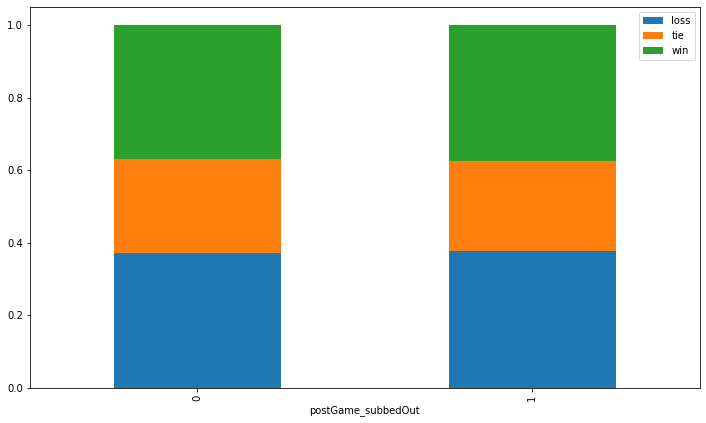

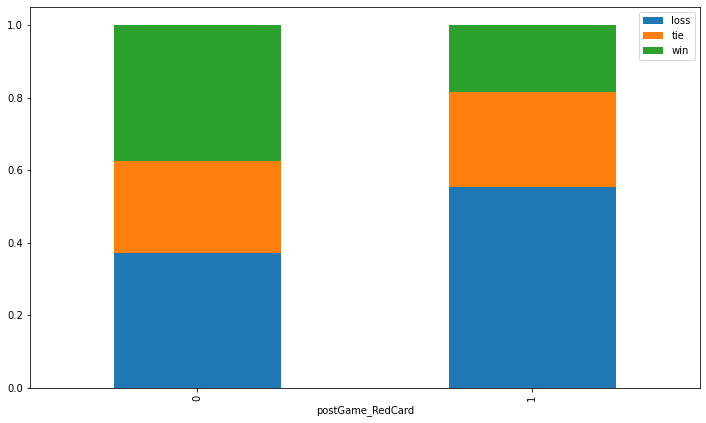

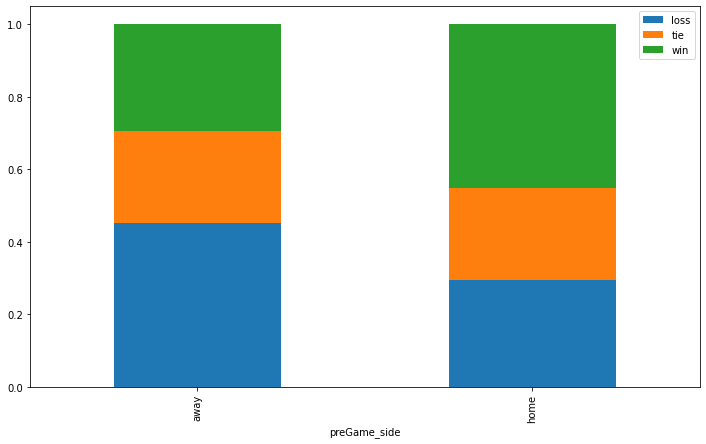

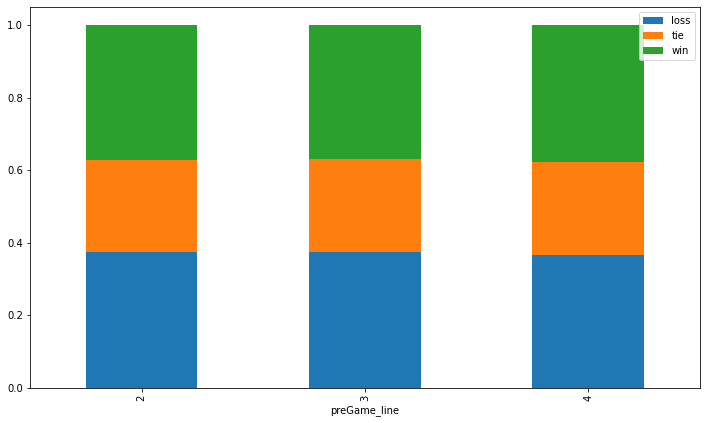

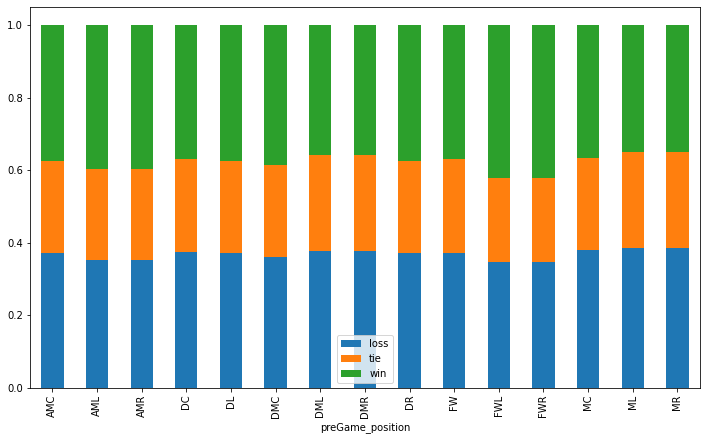

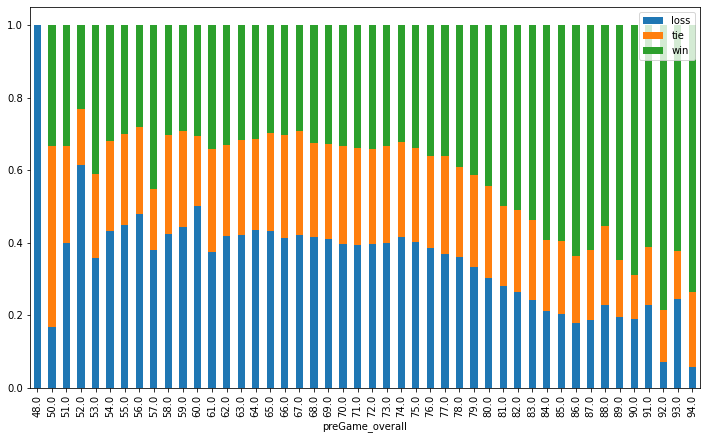

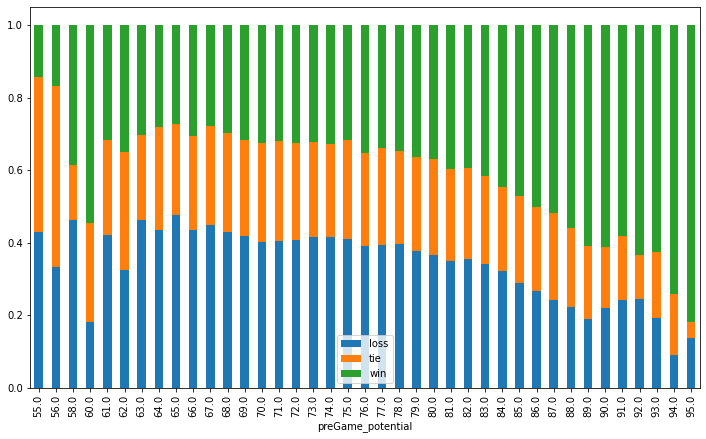

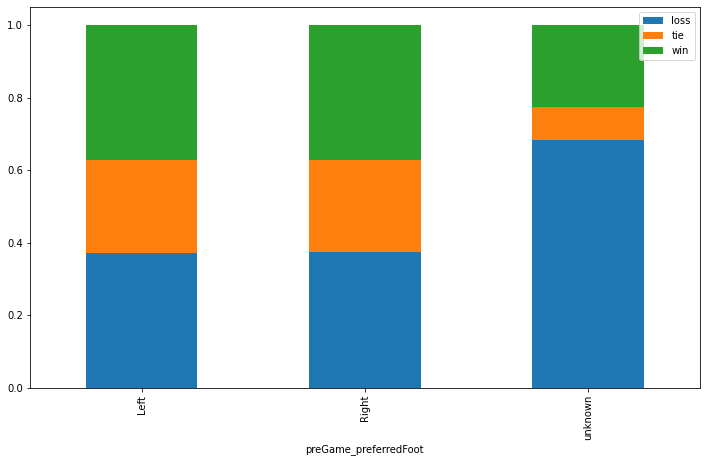

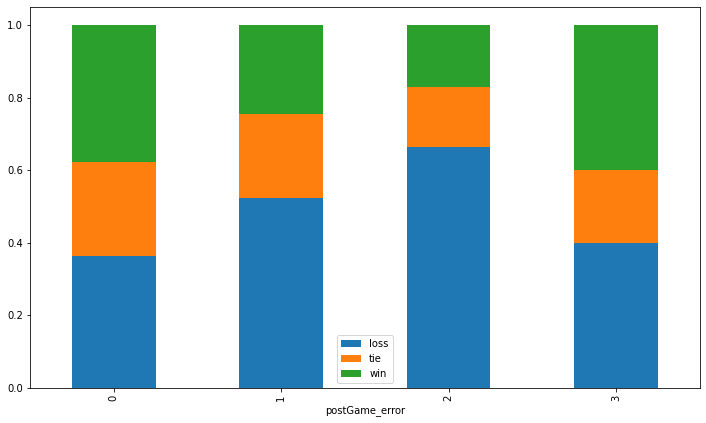

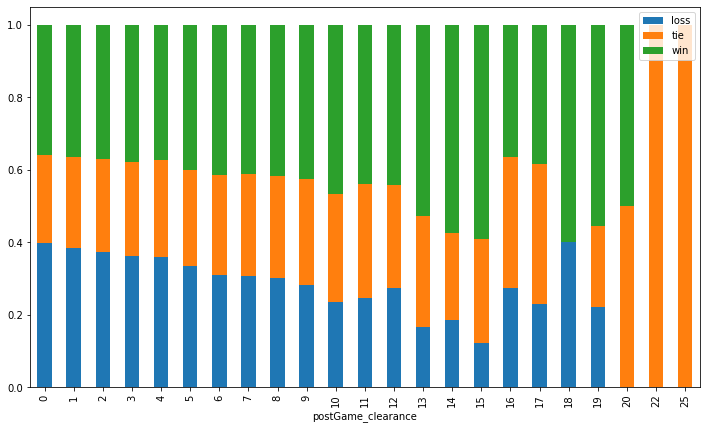

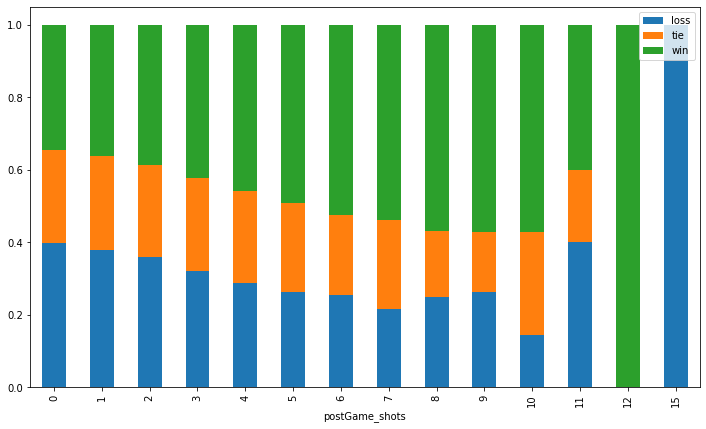

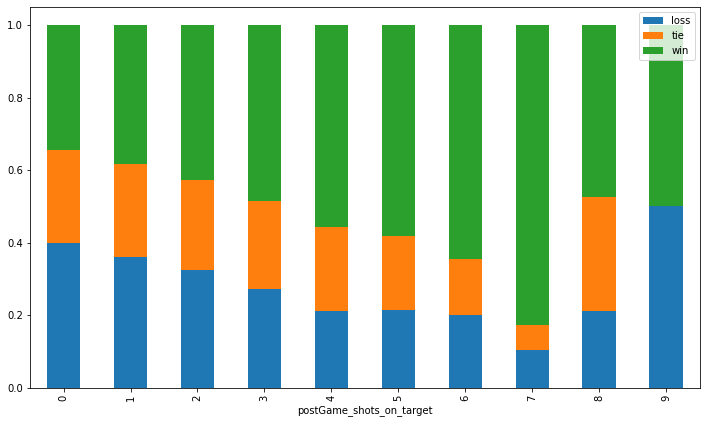

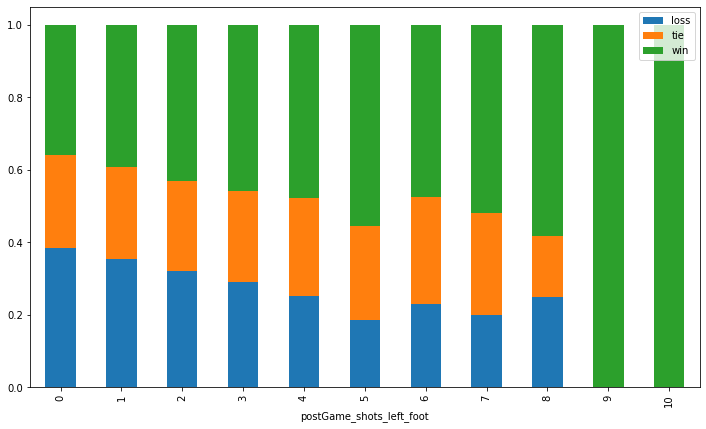

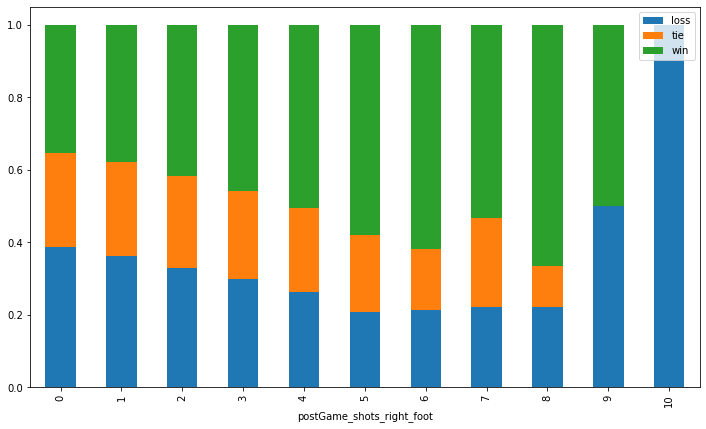

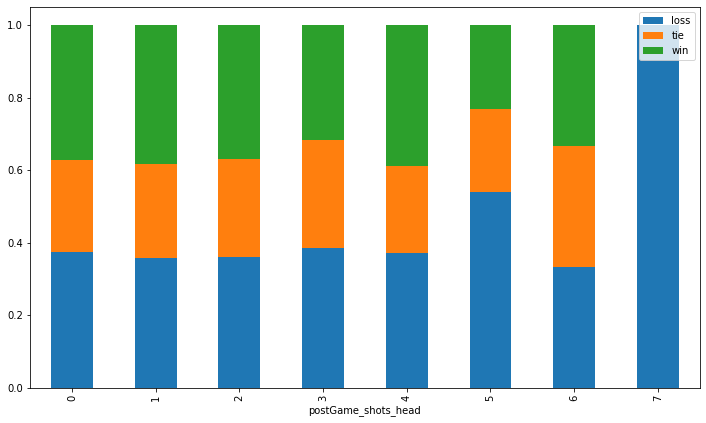

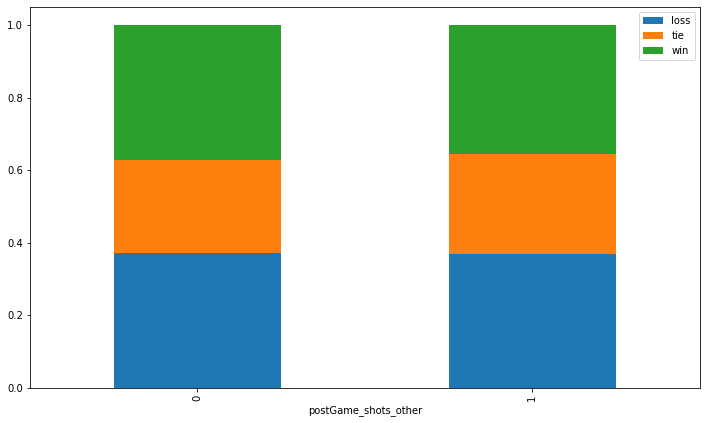

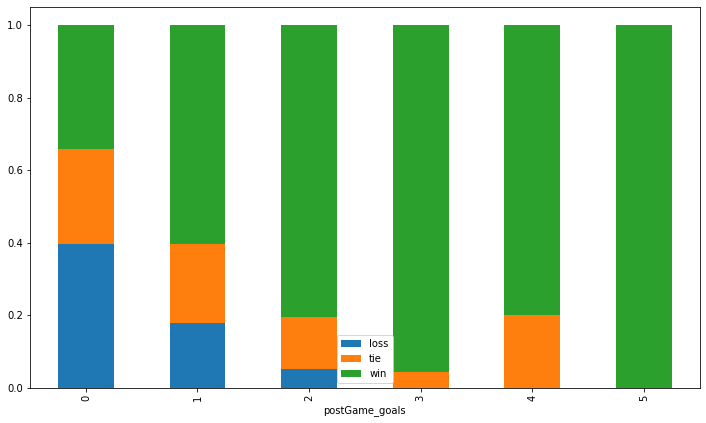

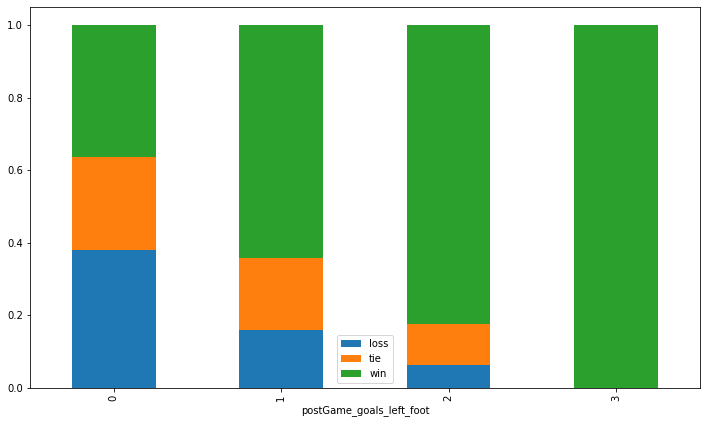

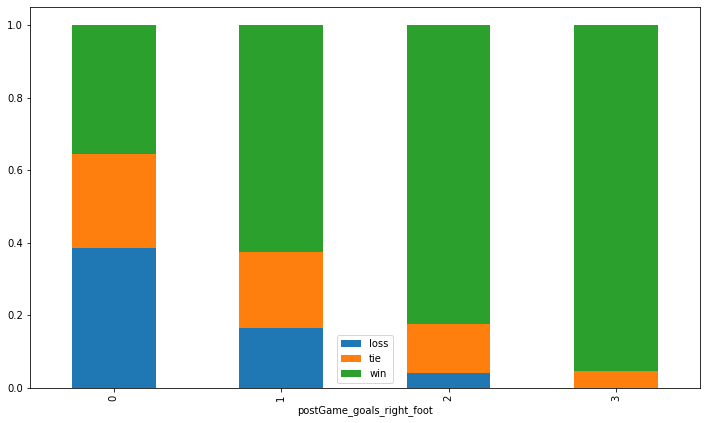

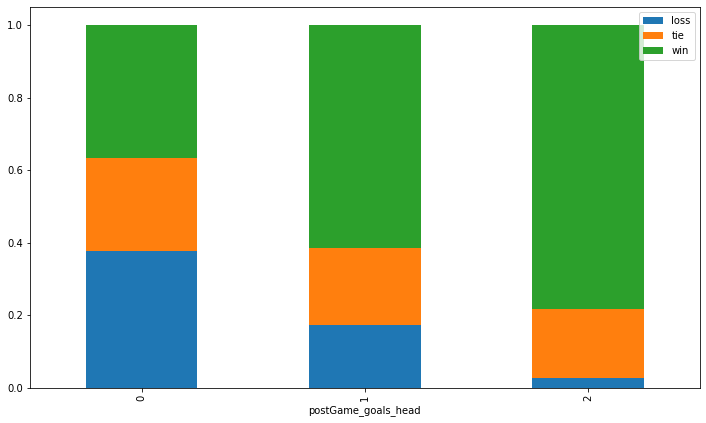

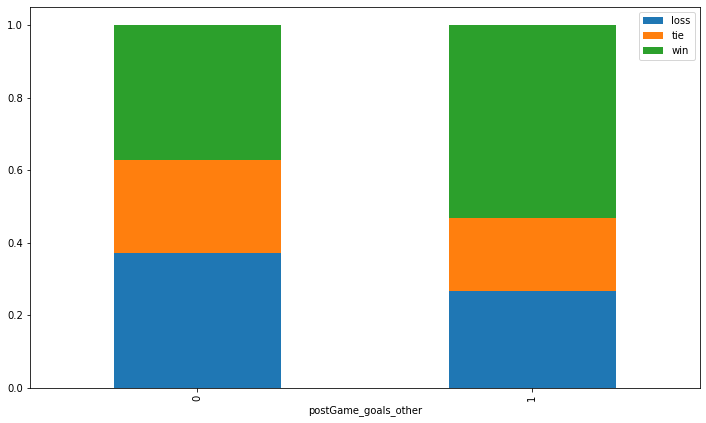

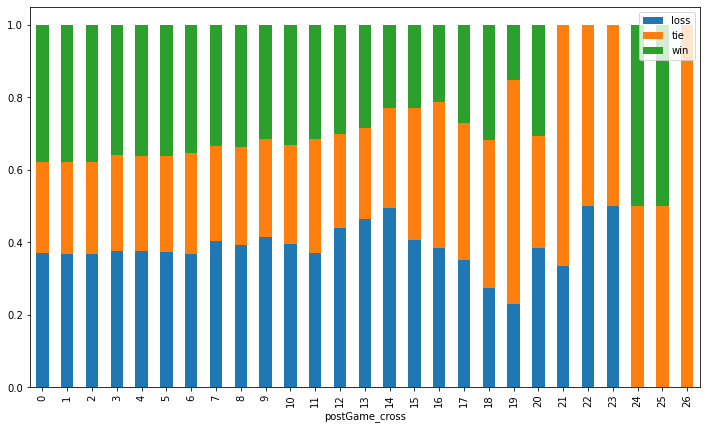

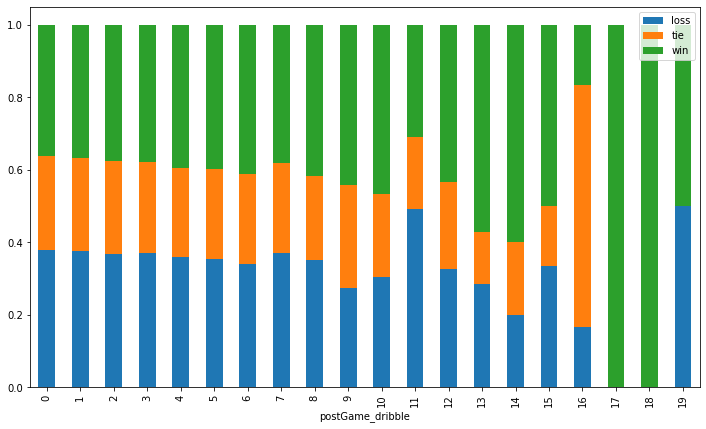

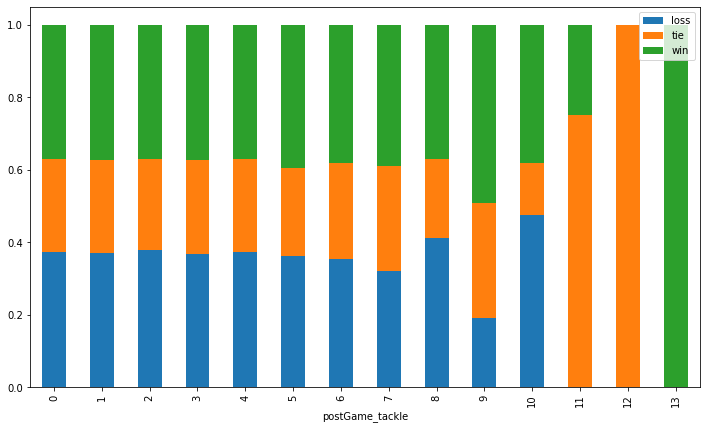

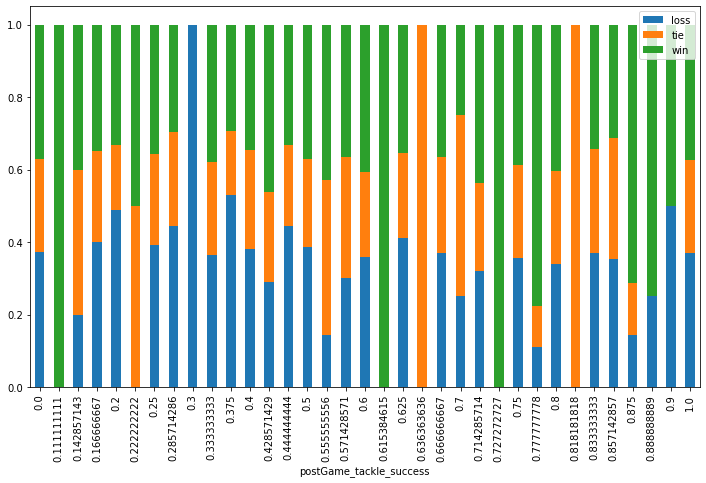

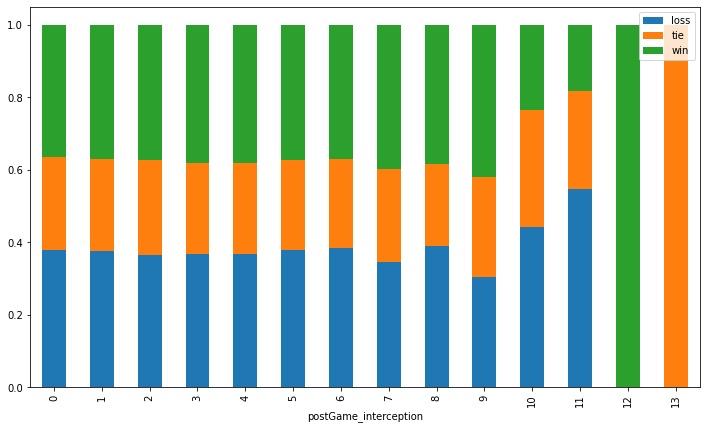

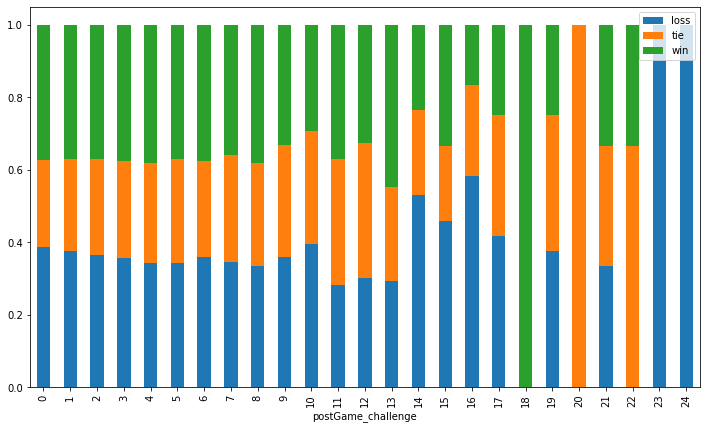

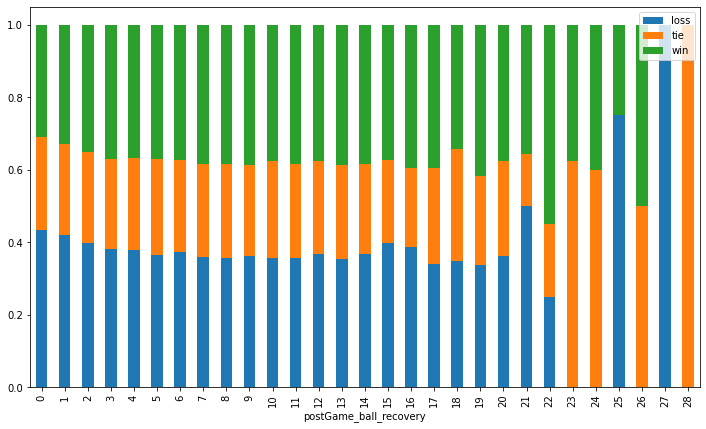

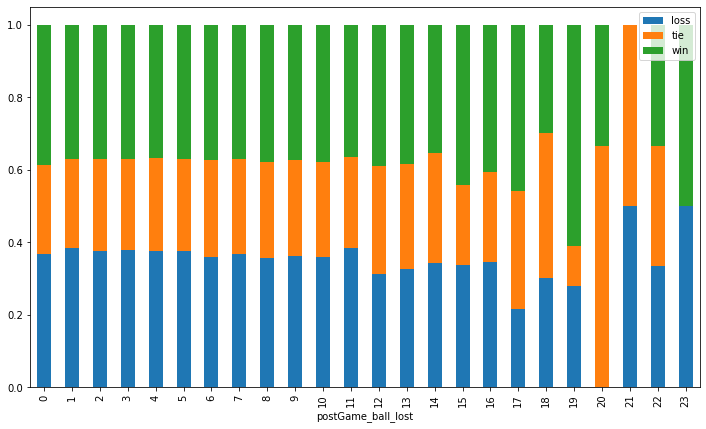

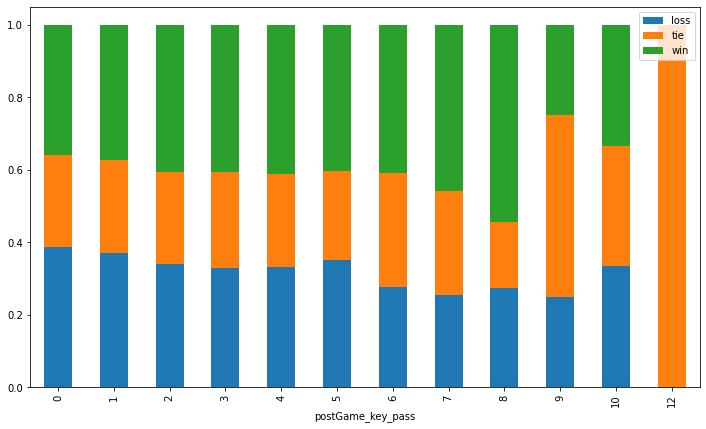

In [ ]:
# Field players discrete attributes
for attr in discrete_attributes_fp:
  variable_data = player_nodes_y[attr]
  ax = pd.crosstab(variable_data, player_nodes_y['team_result'], normalize='index').plot.bar(stacked=True)
  fig = ax.get_figure()
  fig.set_facecolor('w')
  fig.set_size_inches(12, 7)
  ax.legend(['loss', 'tie', 'win'])

### Field players who received a red card were half likely to win. Home players are almost 50% more likely to win. Players with video game rating of more than 73 seem to be more likely to be on the winning side. The more shots(either kind) a player has had, the more likely his team is to win the match. Players scoring 3 or more goals(either kind) have never on the losing side. Players with higher performance indices(player ratings including xG and Stephensen and pre-game expected xG) have higher chances of winning. Players with more passes(either kind) also have higher probabilities for winning. Goalkeepers having more punches are more likely on the side of the winning team. Other attributes such as postition do not reveal any information about the result.

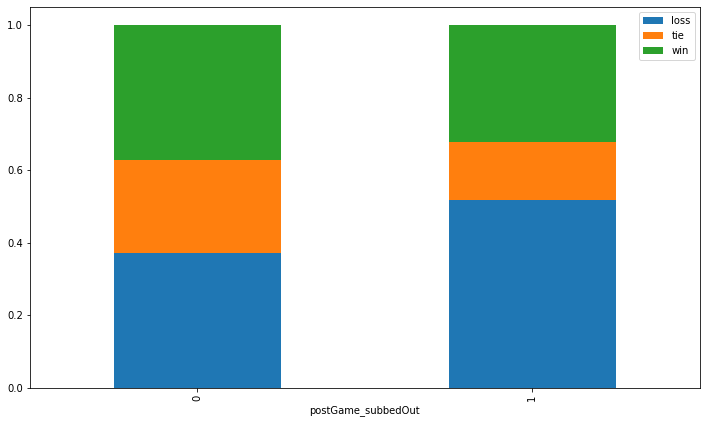

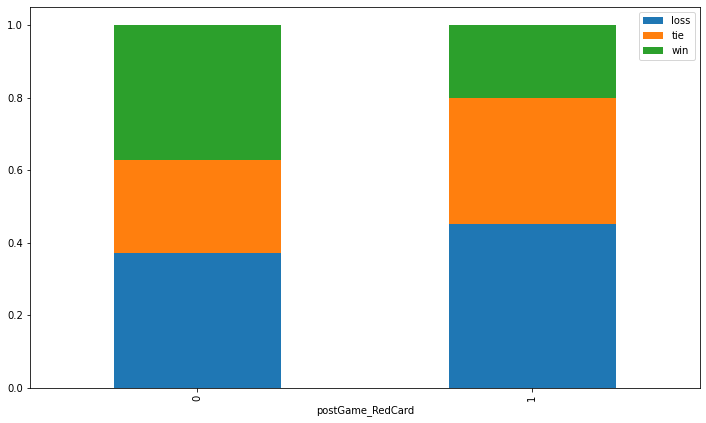

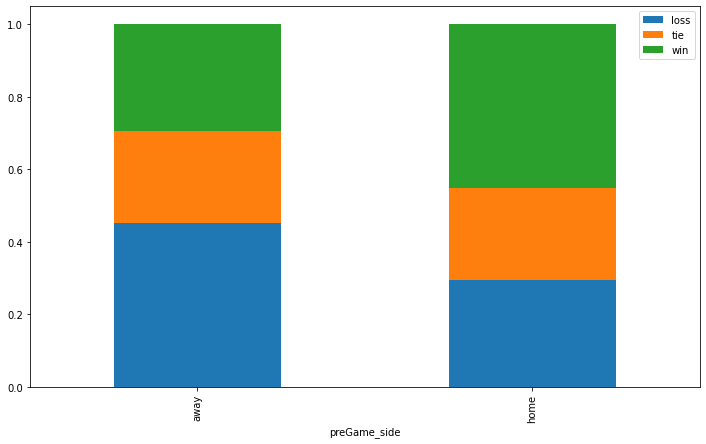

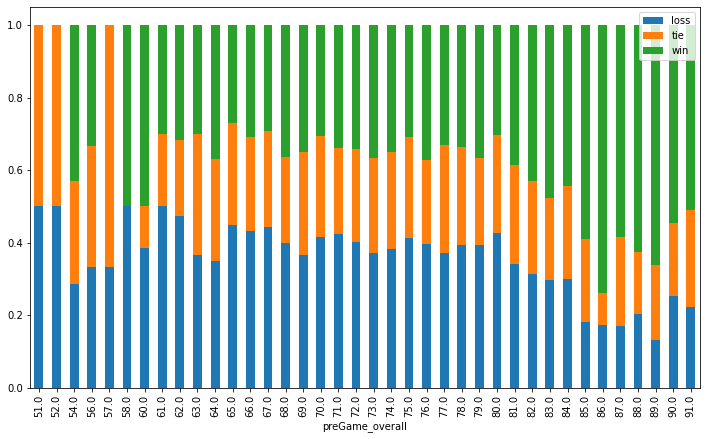

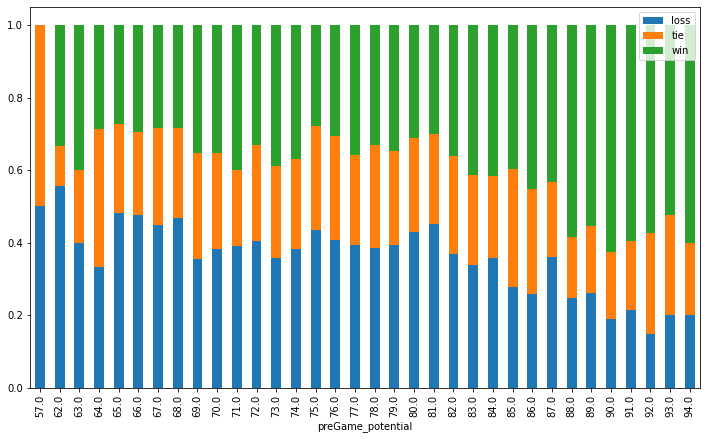

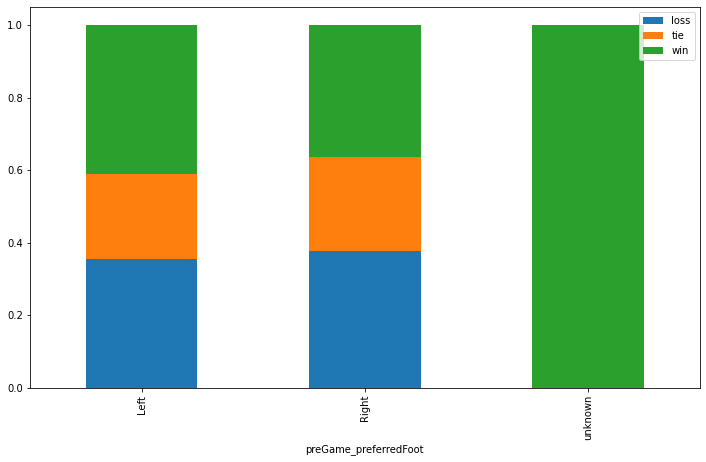

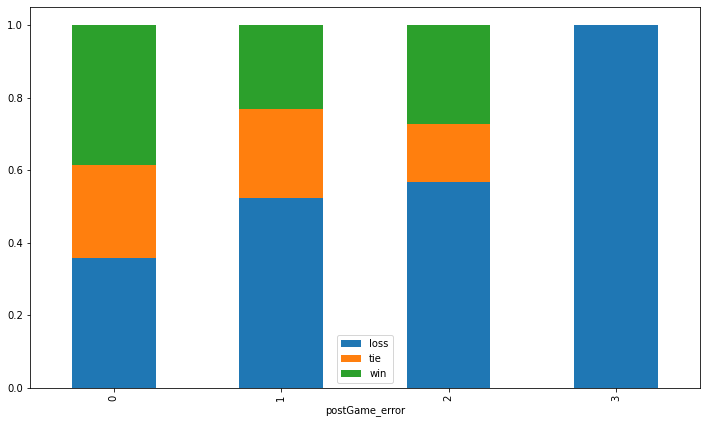

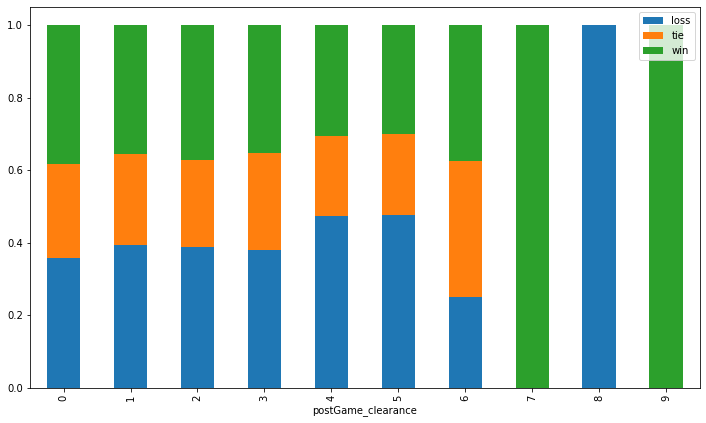

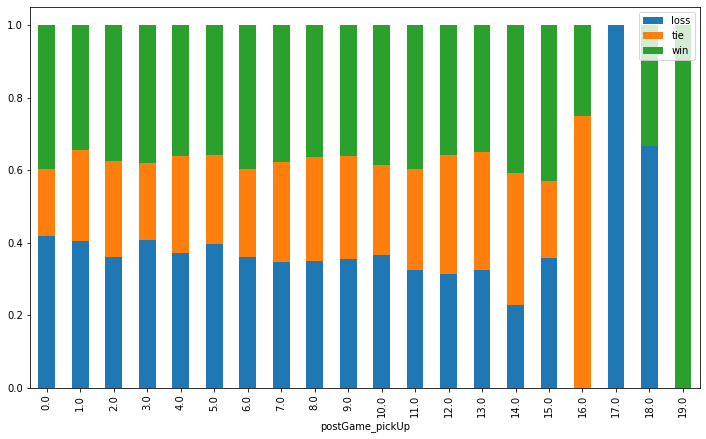

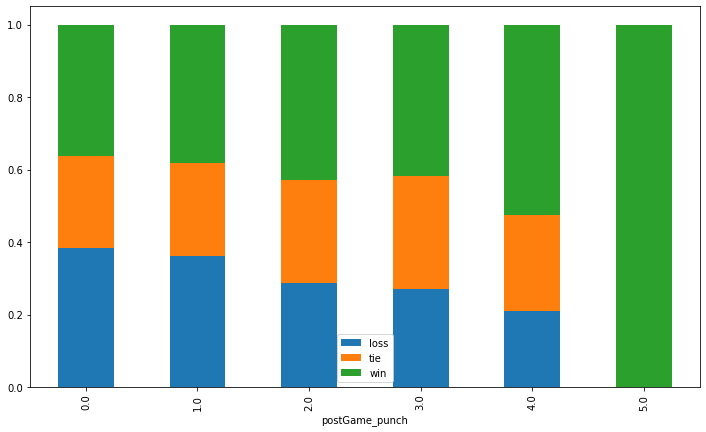

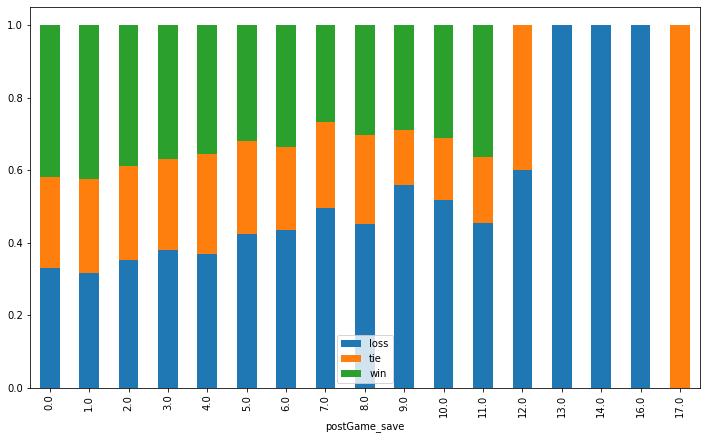

In [ ]:
# Goalkeepers discrete attributes
for attr in discrete_attributes_gk:
  variable_data = gk_nodes_y[attr]
  ax = pd.crosstab(variable_data, gk_nodes_y['team_result'], normalize='index').plot.bar(stacked=True)
  fig = ax.get_figure()
  fig.set_size_inches(12, 7)
  fig.set_facecolor('w')
  ax.legend(['loss', 'tie', 'win'])

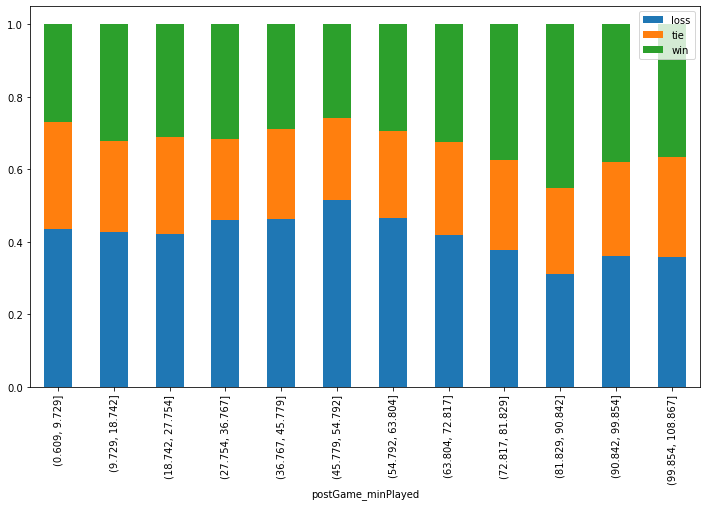

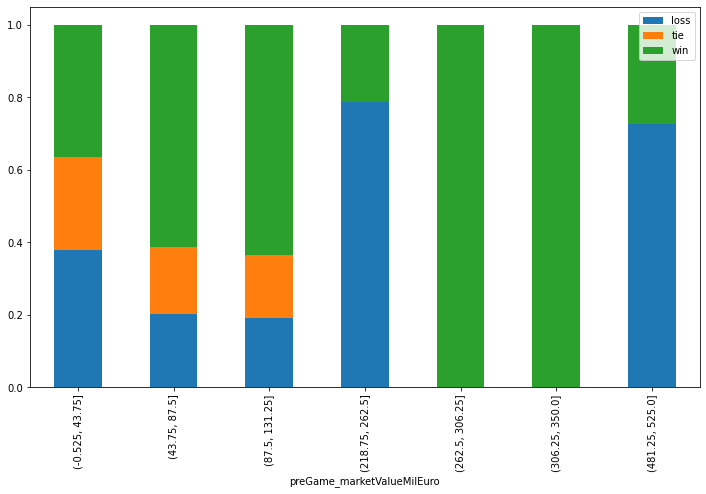

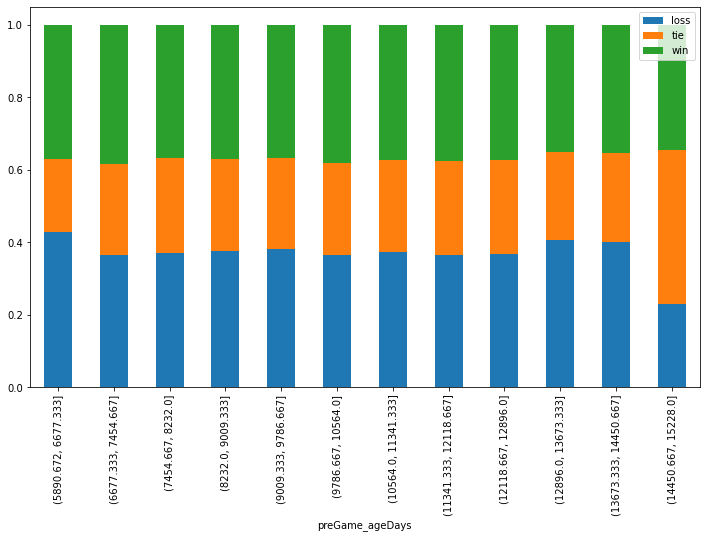

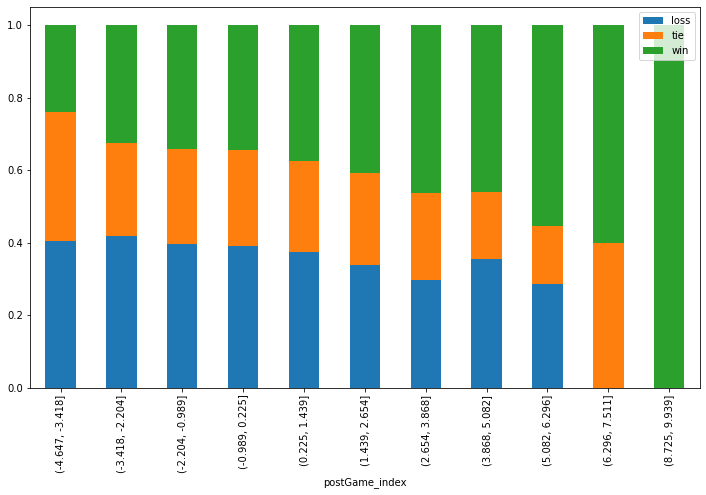

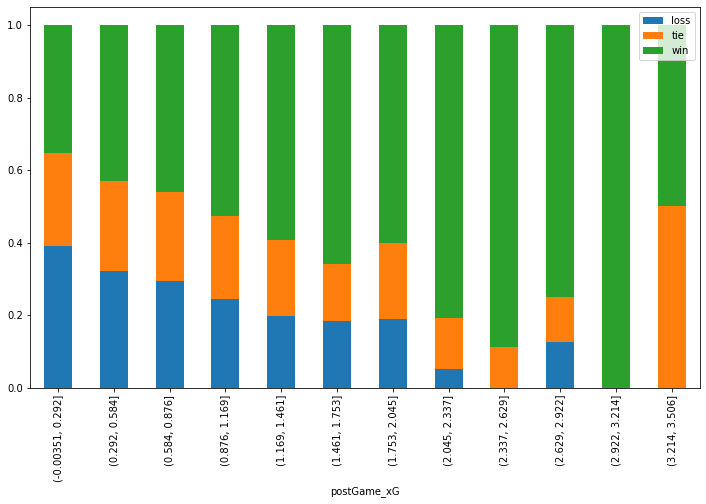

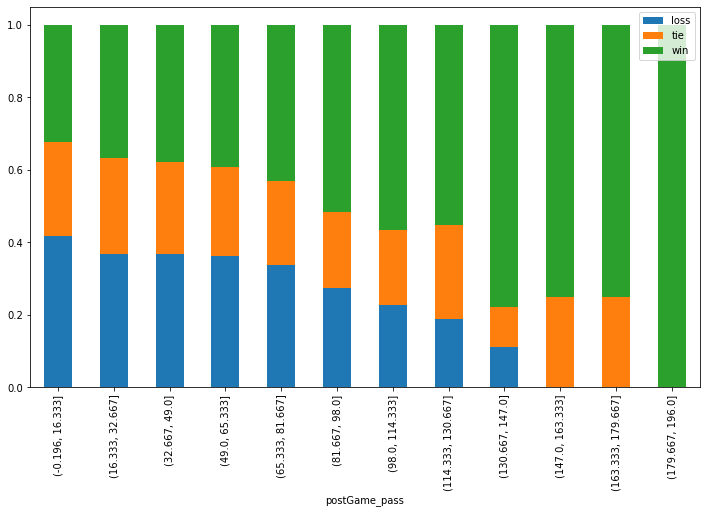

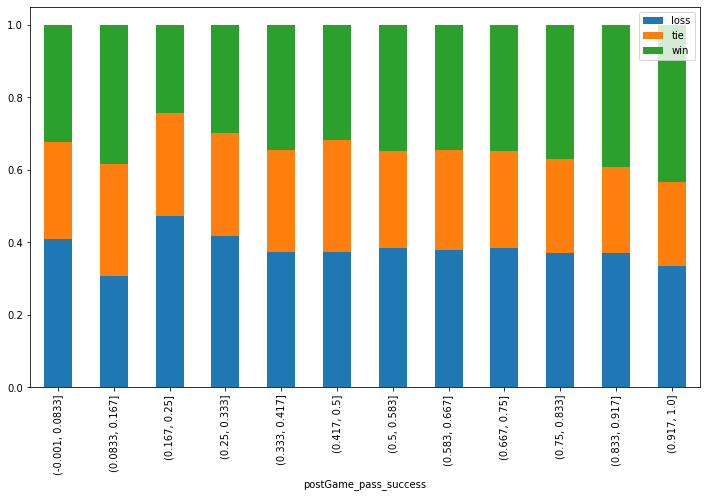

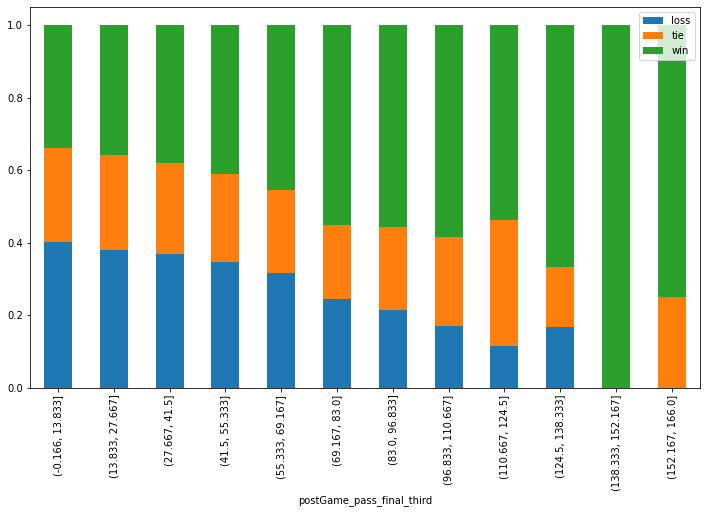

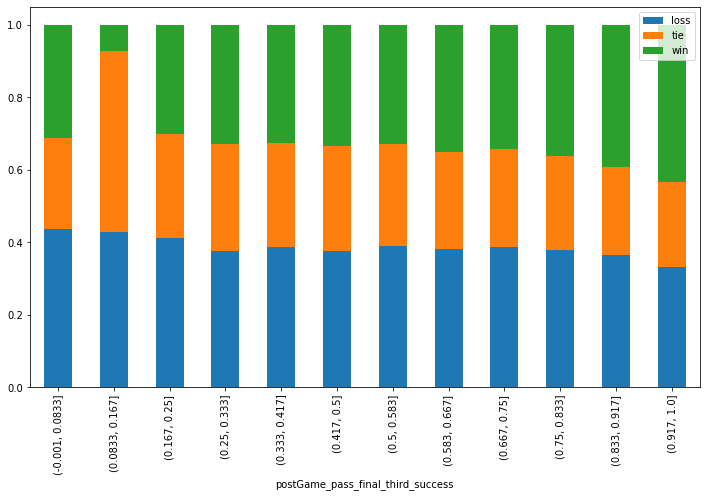

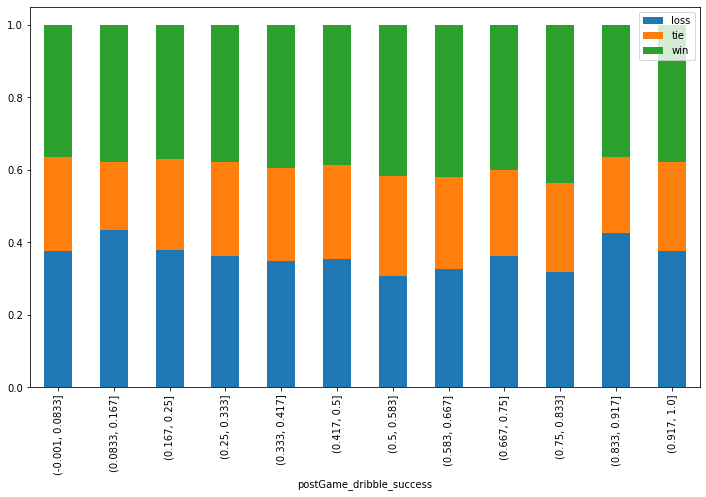

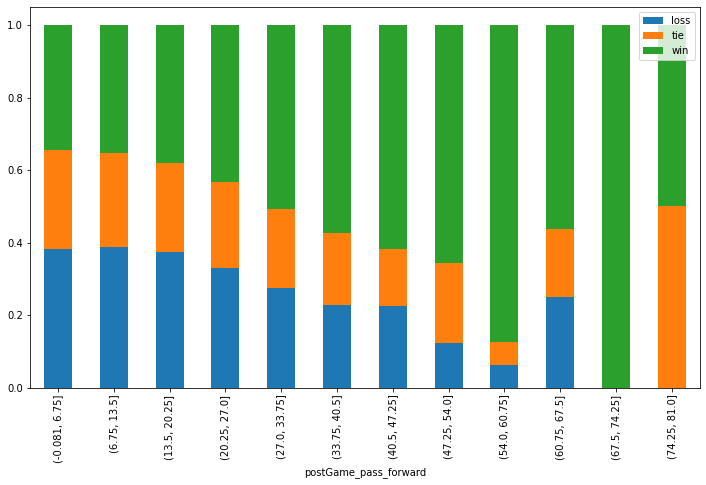

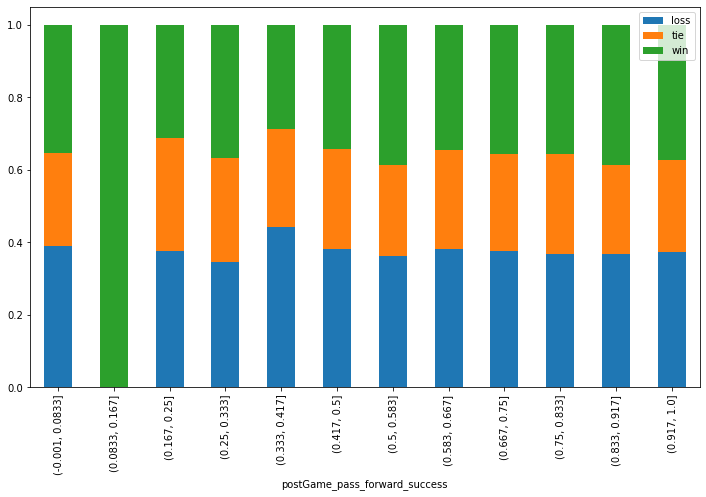

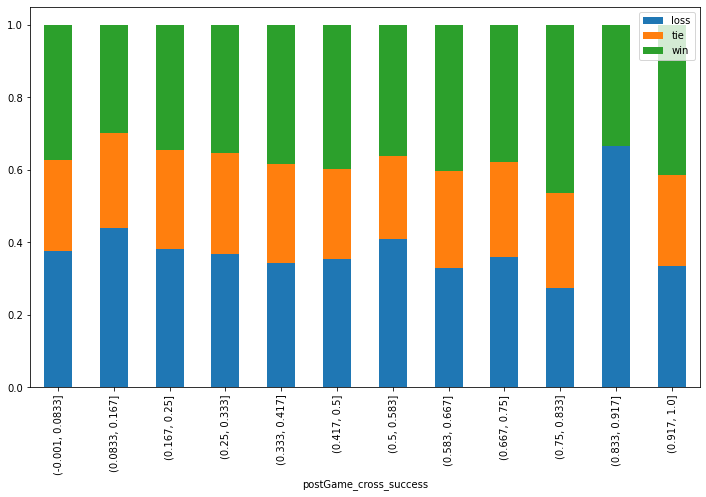

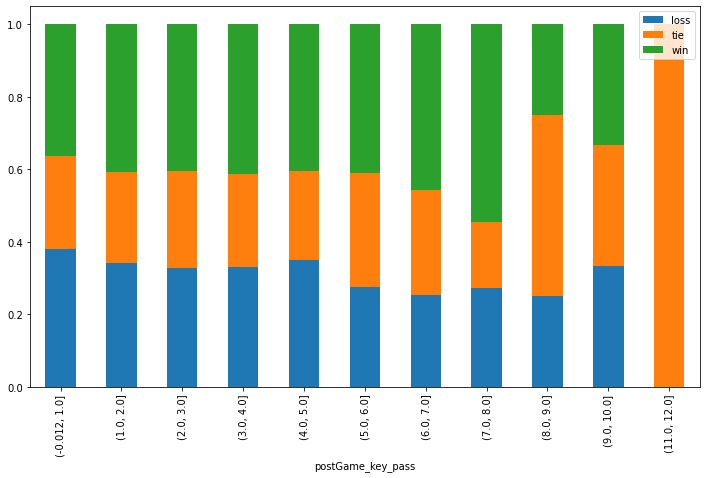

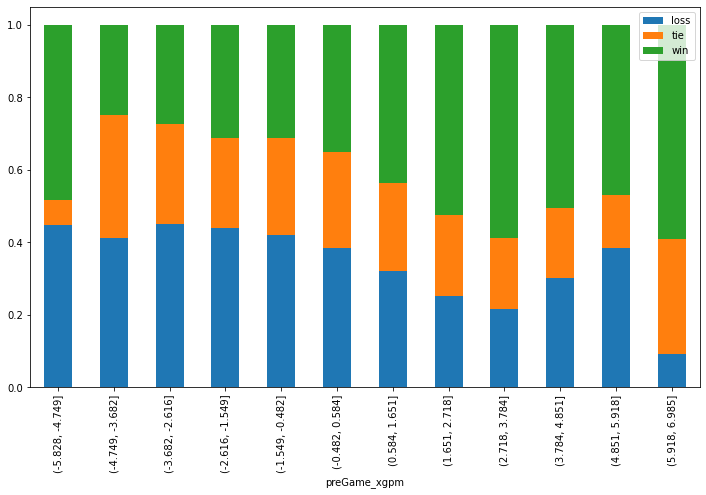

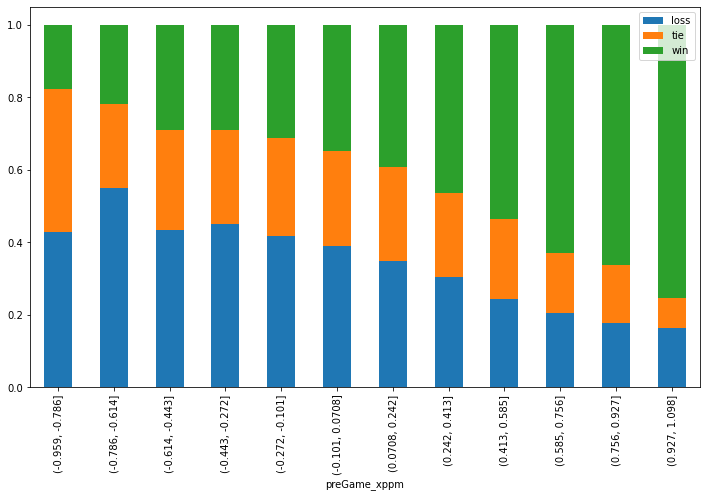

In [ ]:
# Field players continuous attributes
for attr in continuous_attributes_fp:
  variable_data = player_nodes_y[attr]
  ax = pd.crosstab(
      pd.cut(player_nodes_y[attr].values.reshape(-1), bins=12), 
      player_nodes_y['team_result'], normalize='index').plot.bar(stacked=True)
  fig = ax.get_figure()
  fig.set_facecolor('w')
  fig.set_size_inches(12, 7)
  ax.set_xlabel(attr)
  ax.legend(['loss', 'tie', 'win'])

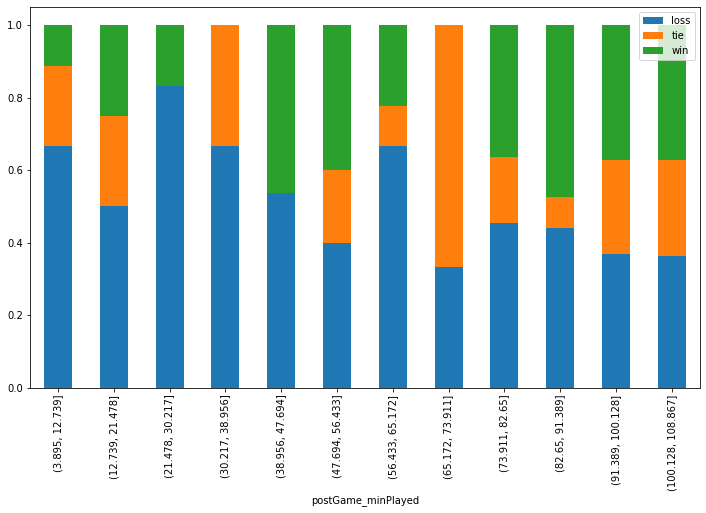

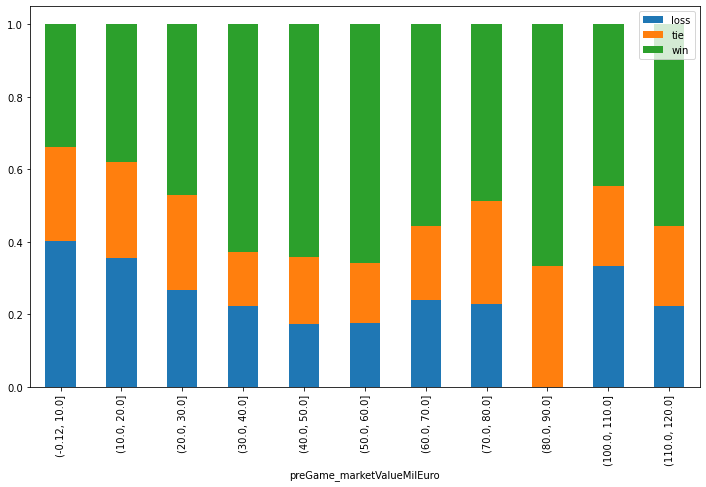

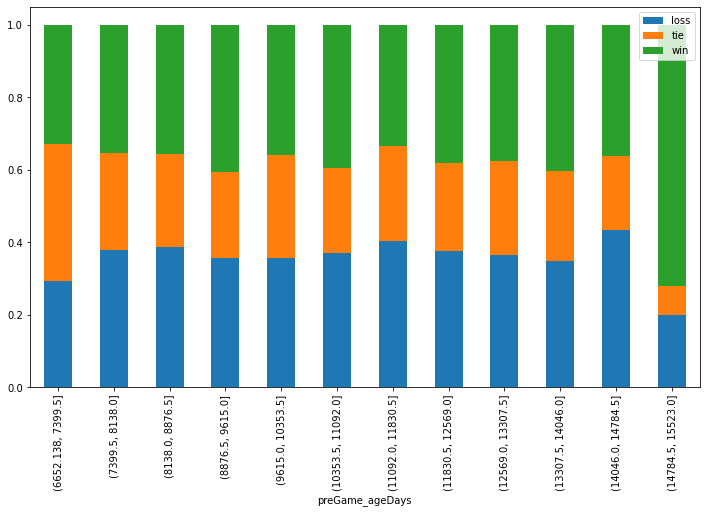

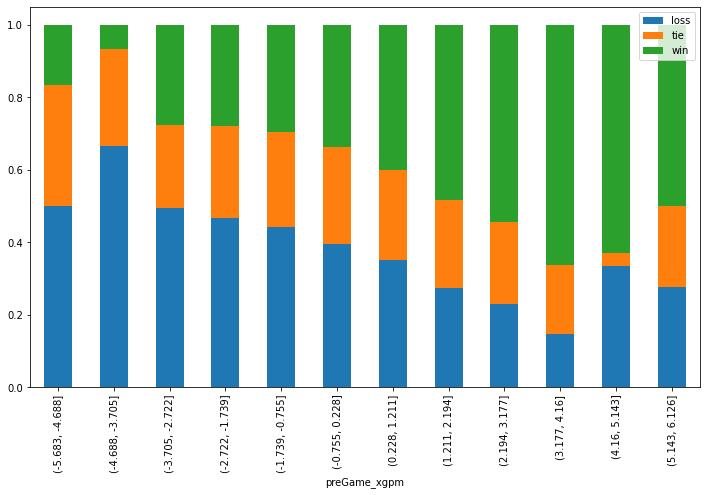

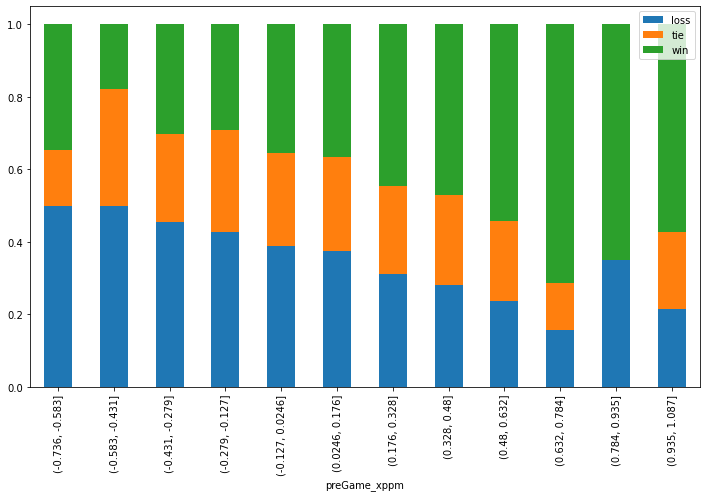

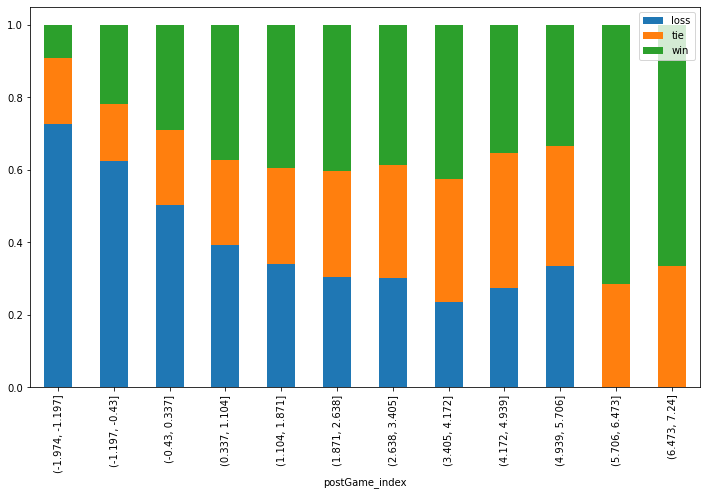

In [ ]:
# Goalkeepers continuous attributes
for attr in continuous_attributes_gk:
  variable_data = gk_nodes_y[attr]
  ax = pd.crosstab(
      pd.cut(gk_nodes_y[attr].values.reshape(-1), bins=12), 
      gk_nodes_y['team_result'], normalize='index').plot.bar(stacked=True)
  fig = ax.get_figure()
  fig.set_facecolor('w')
  fig.set_size_inches(12, 7)
  ax.set_xlabel(attr)
  ax.legend(['loss', 'tie', 'win'])

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1807a148c0> (for post_execute):


KeyboardInterrupt: ignored

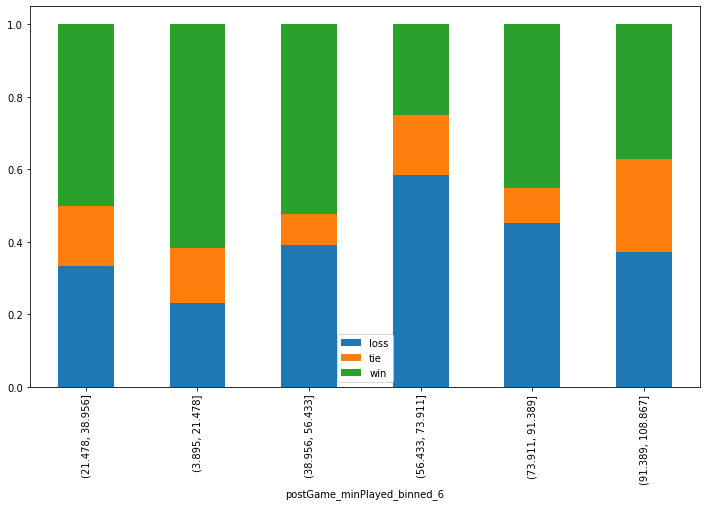

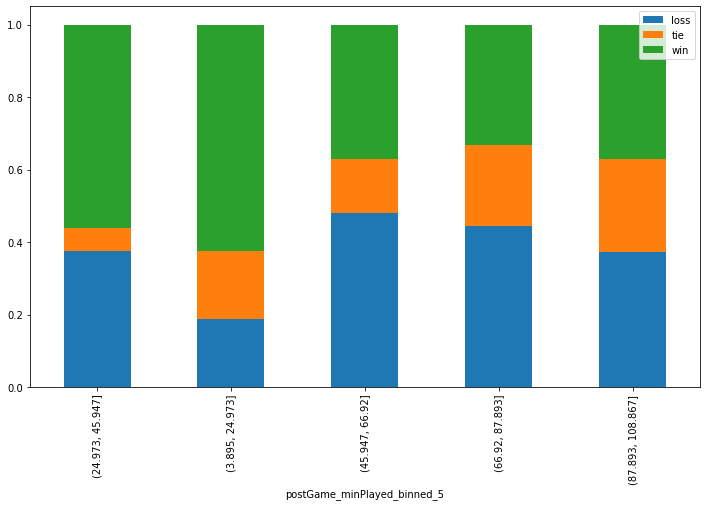

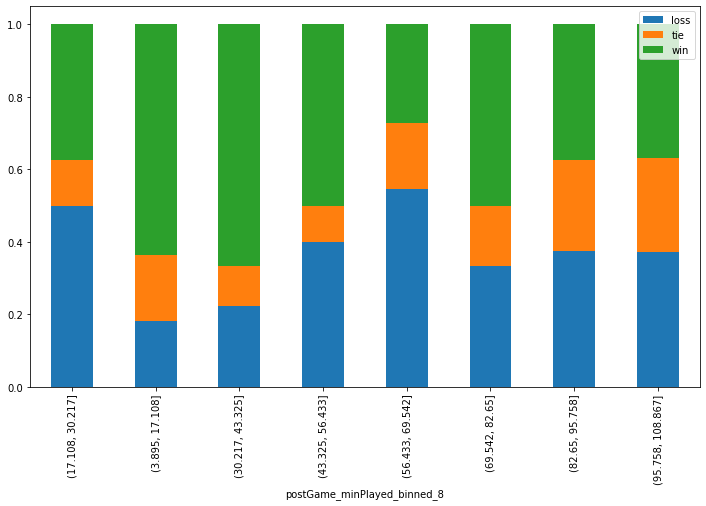

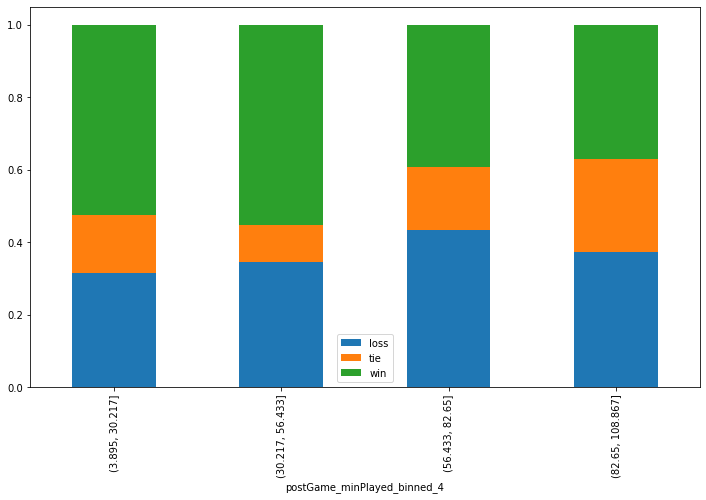

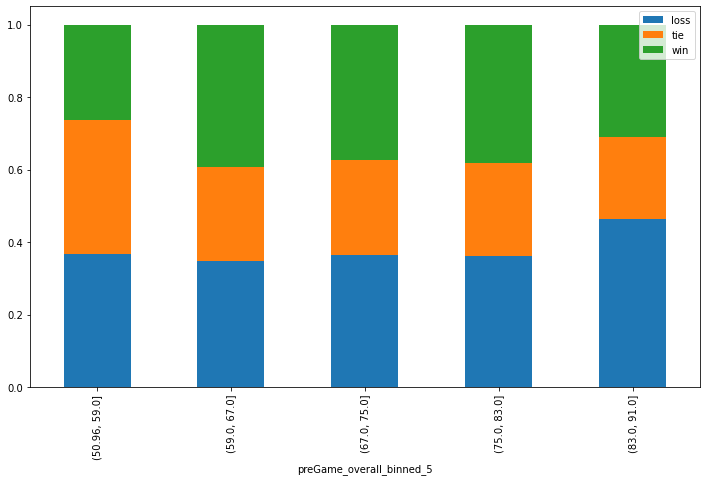

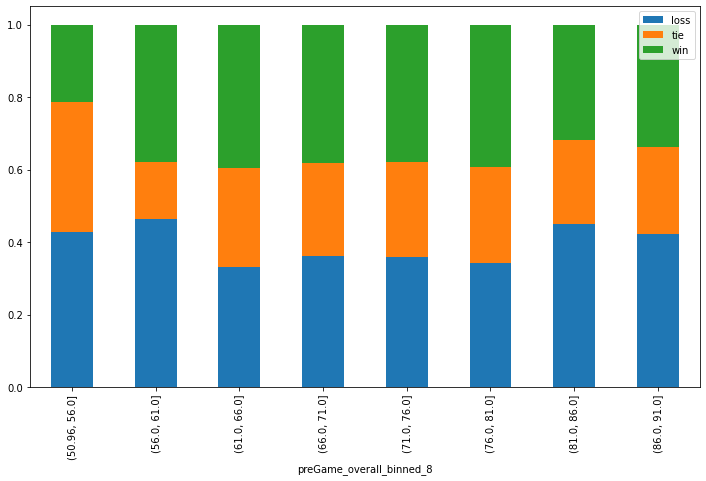

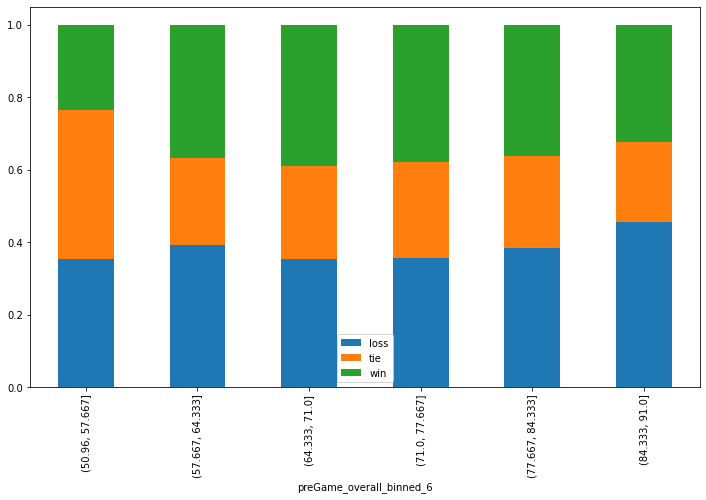

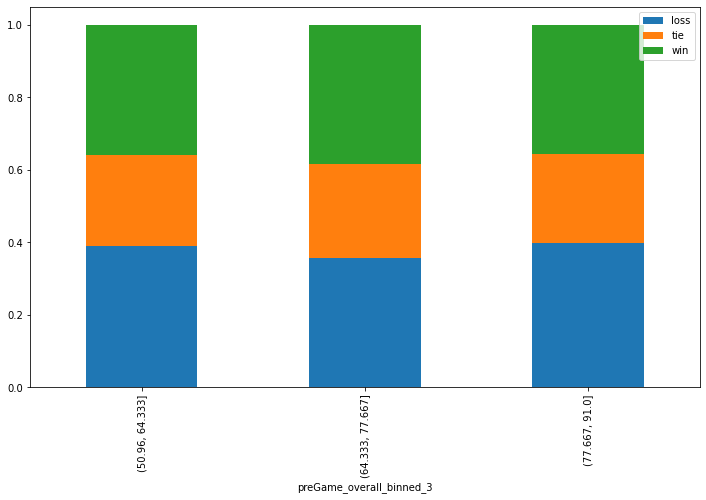

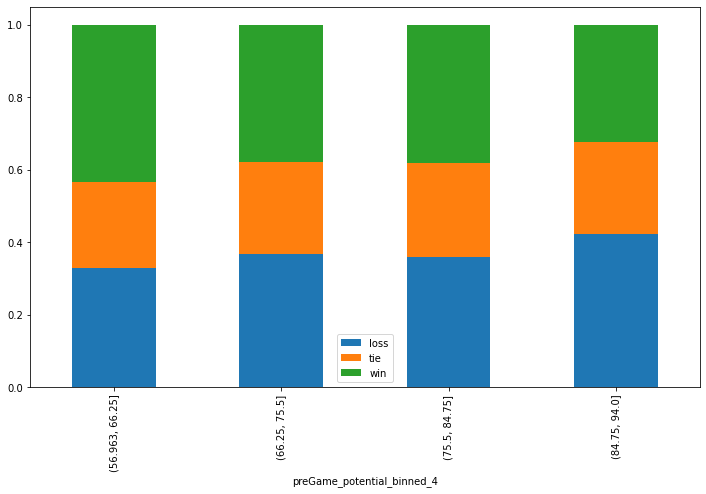

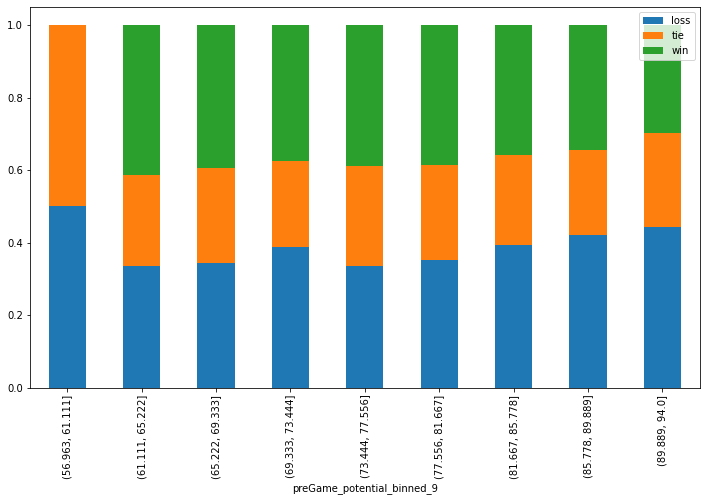

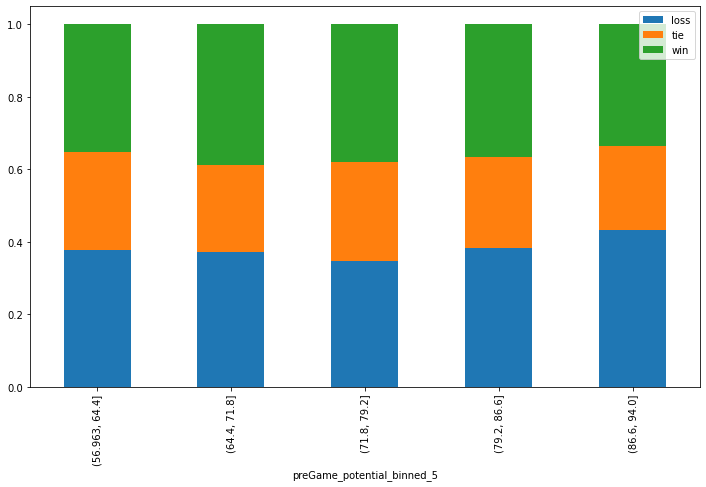

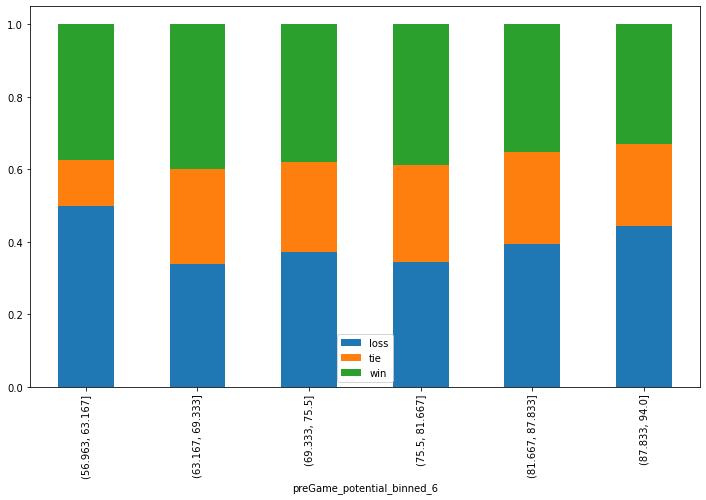

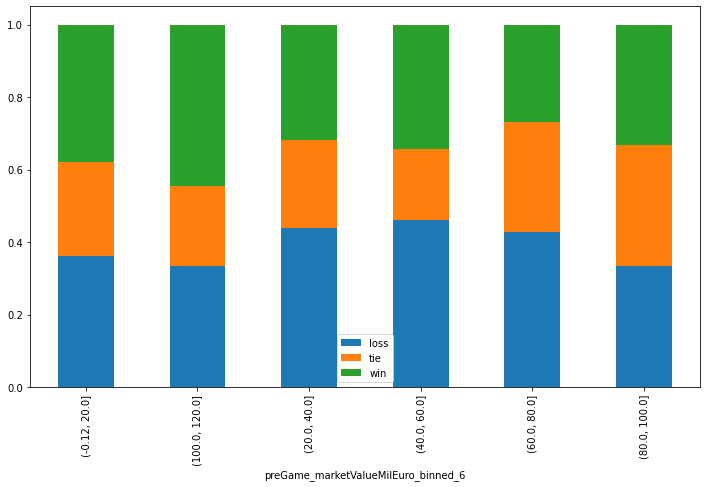

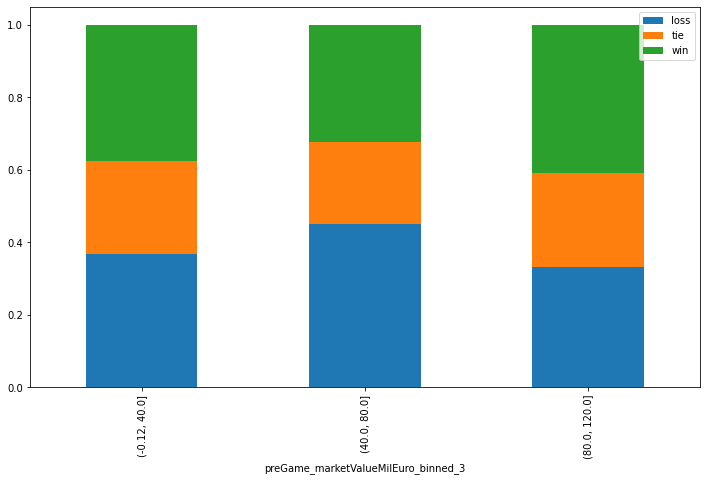

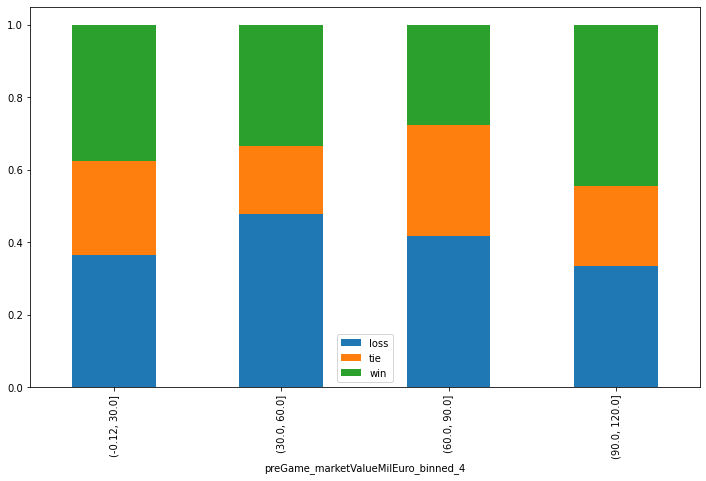

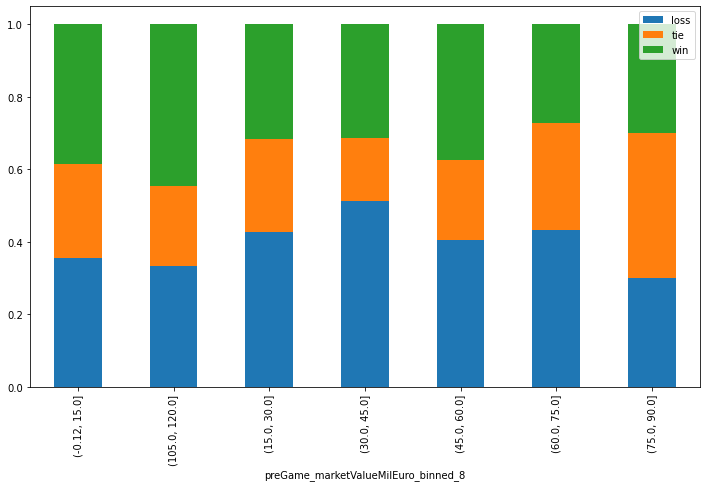

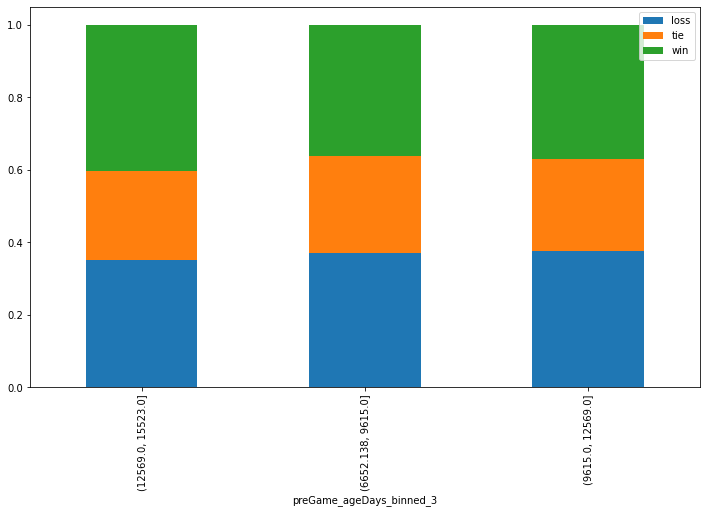

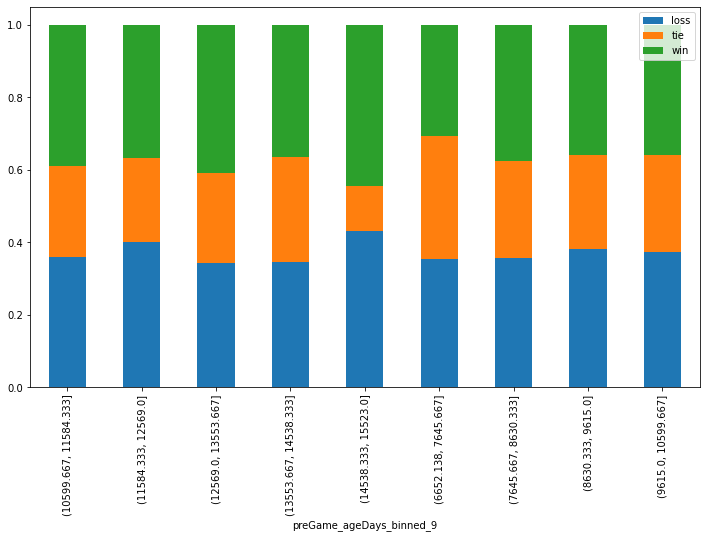

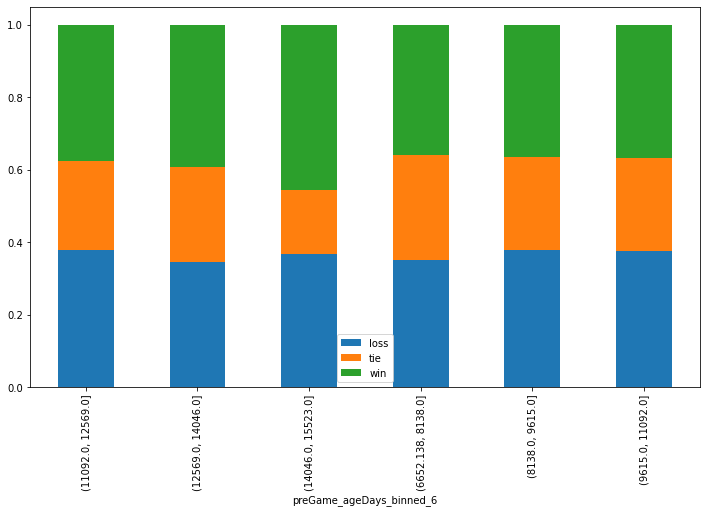

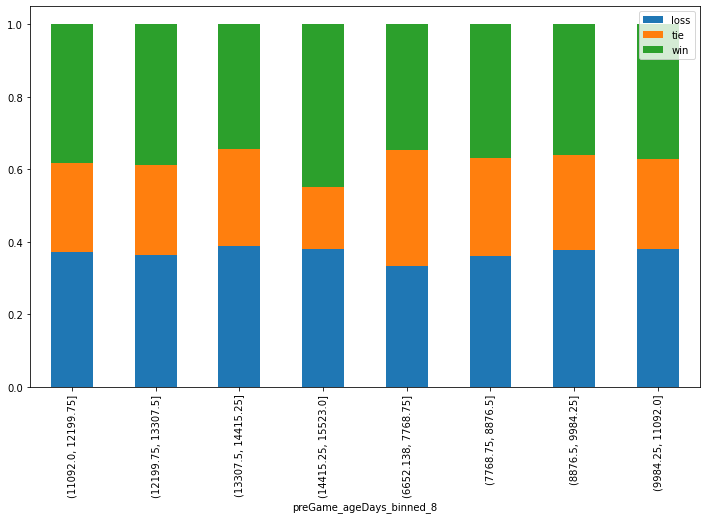

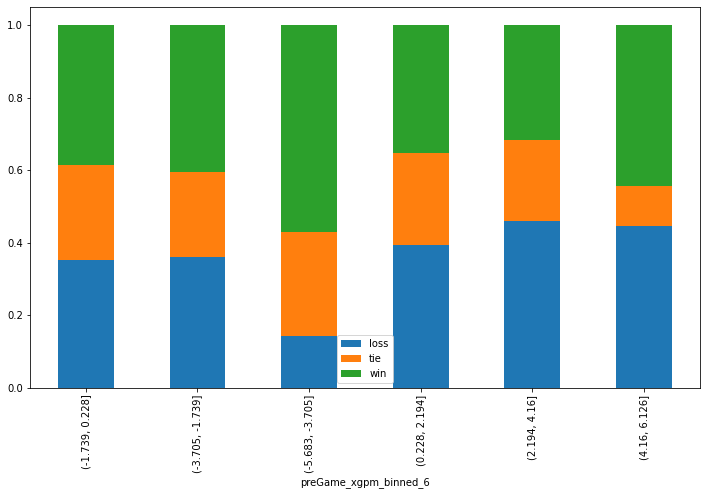

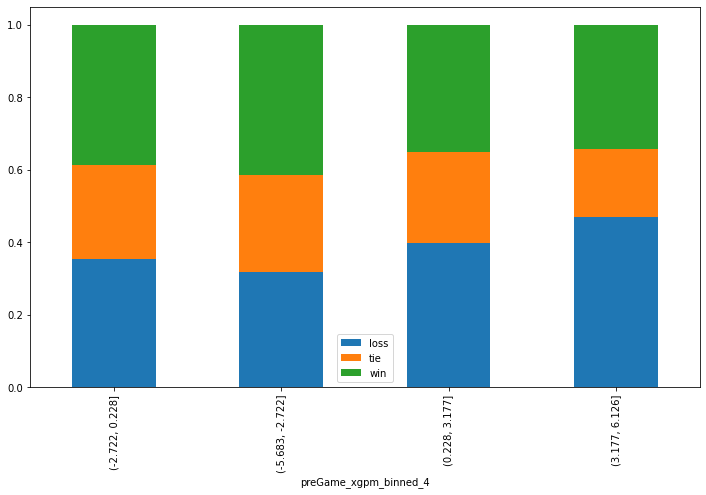

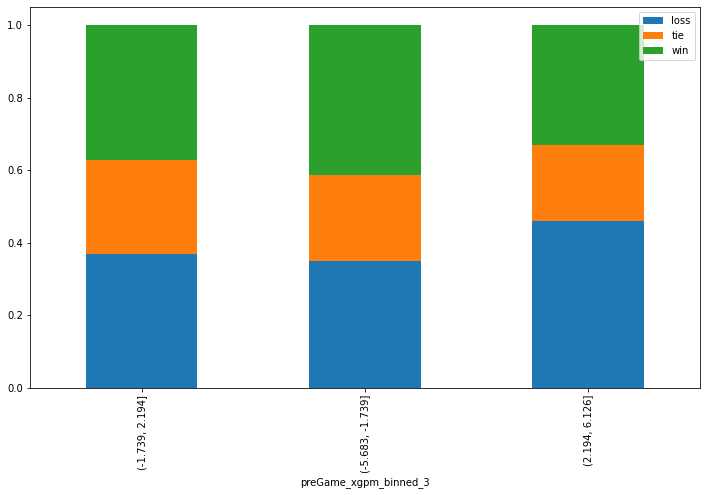

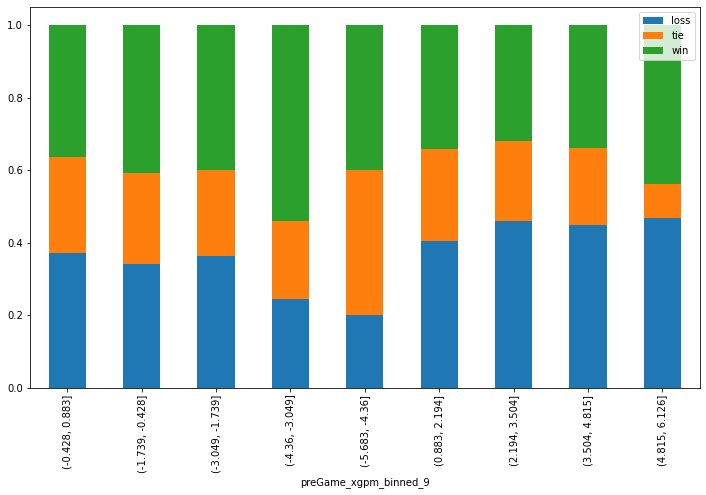

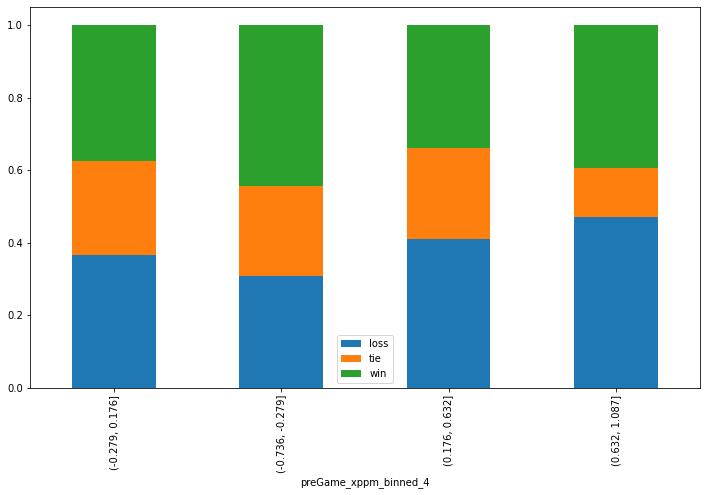

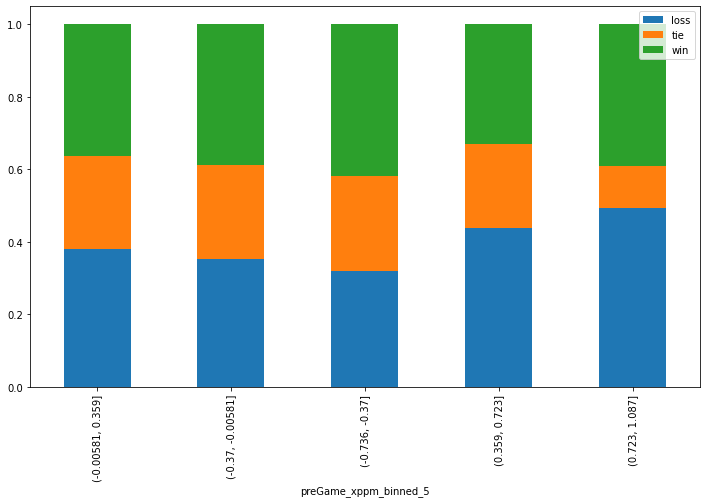

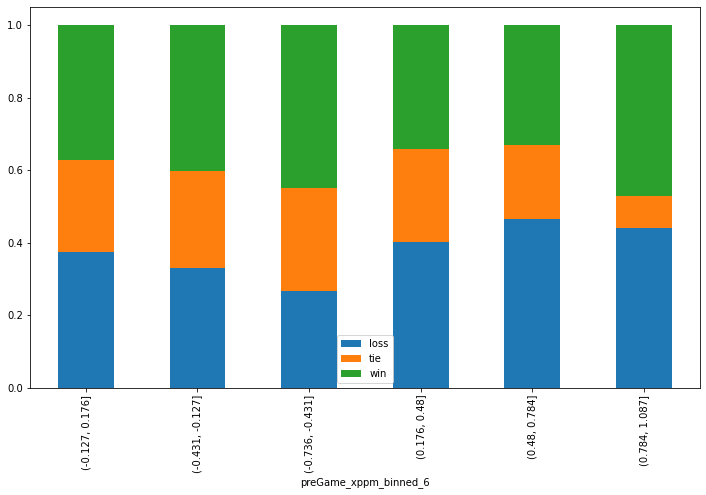

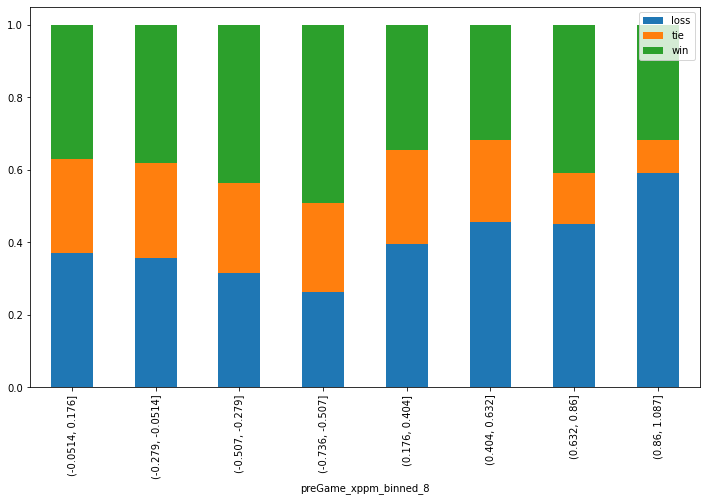

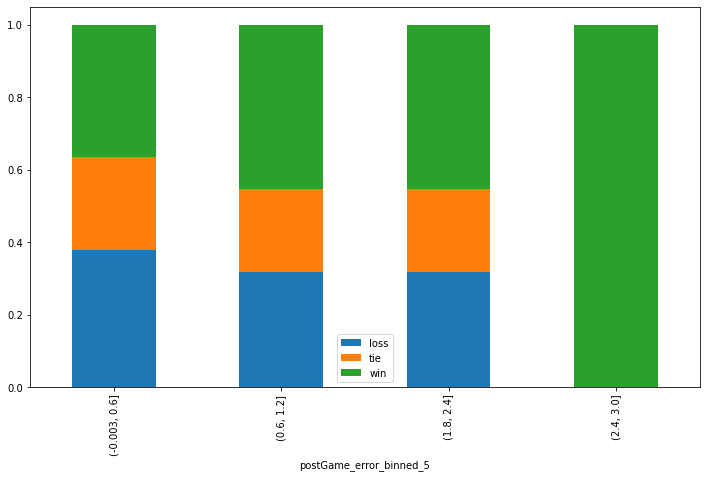

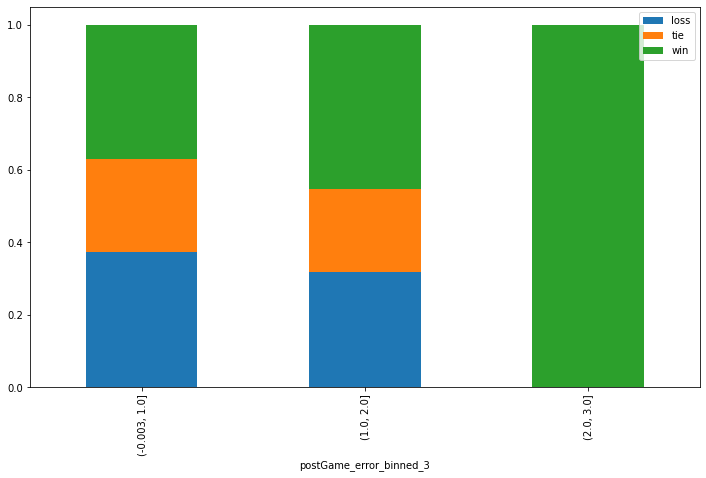

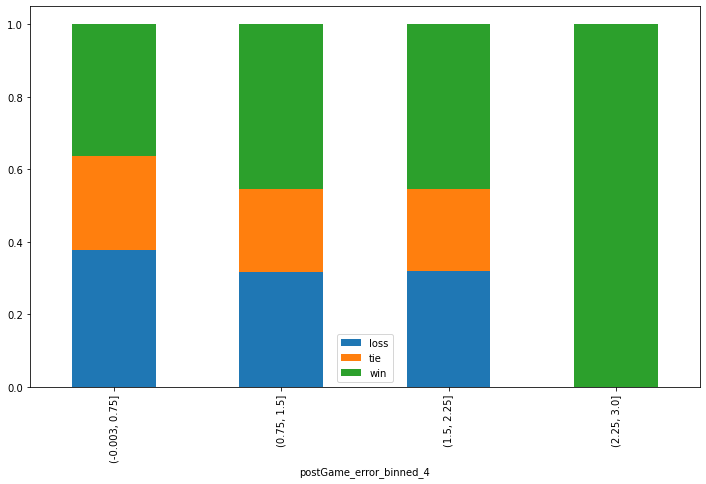

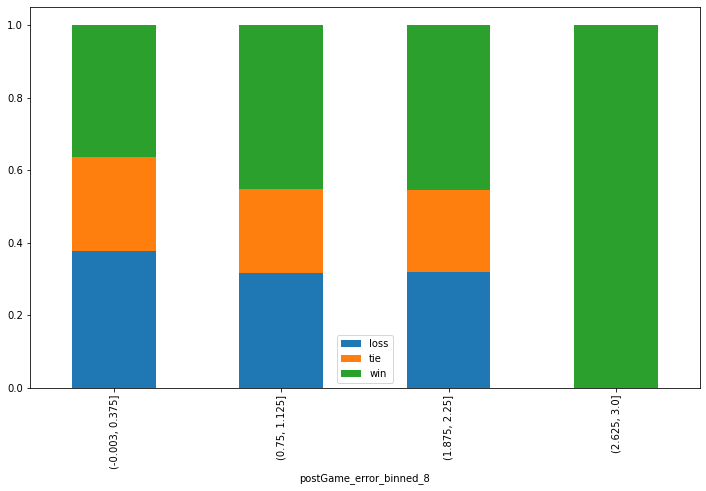

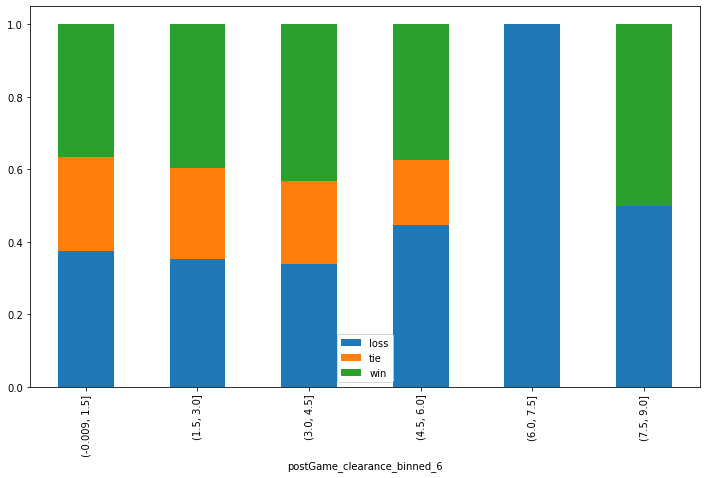

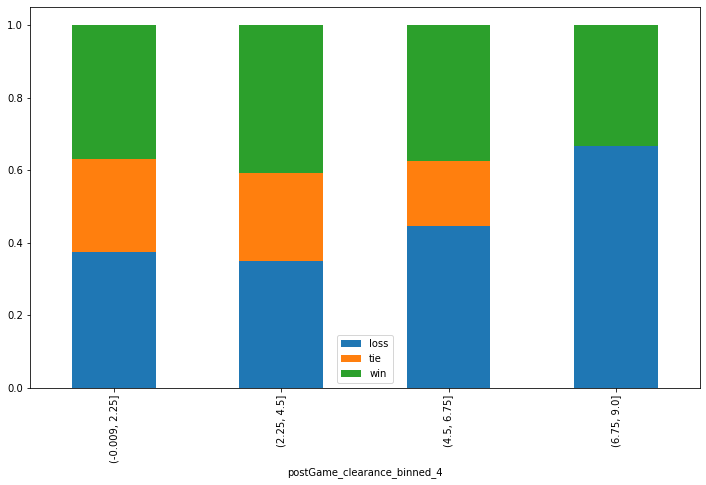

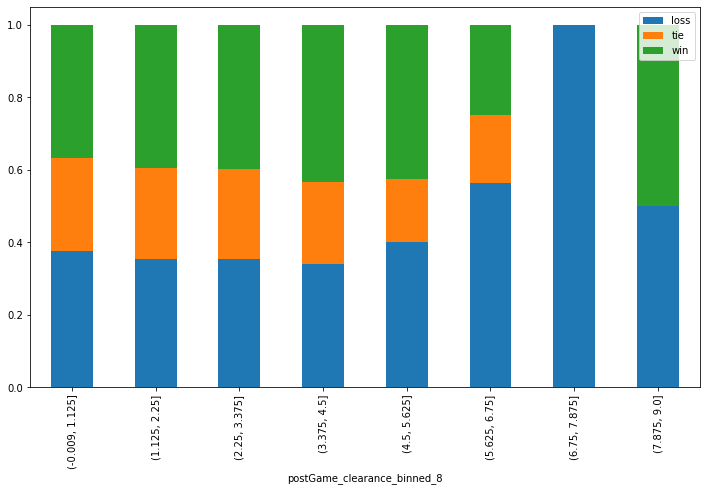

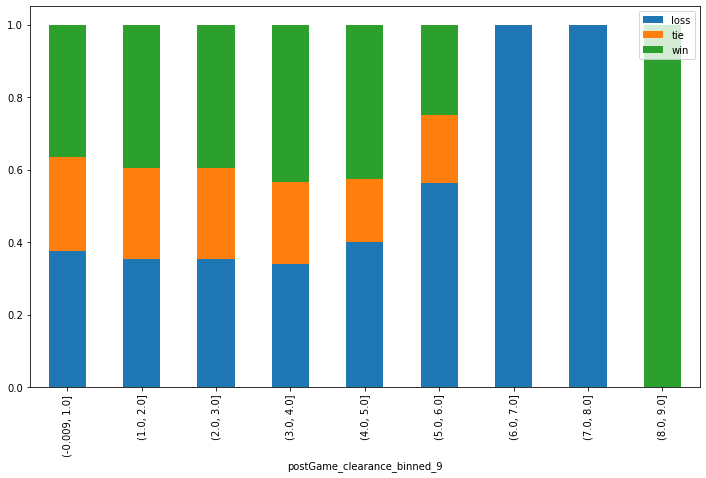

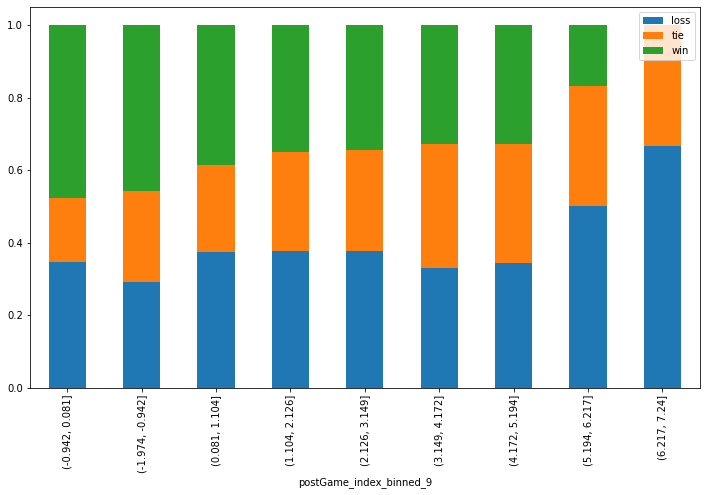

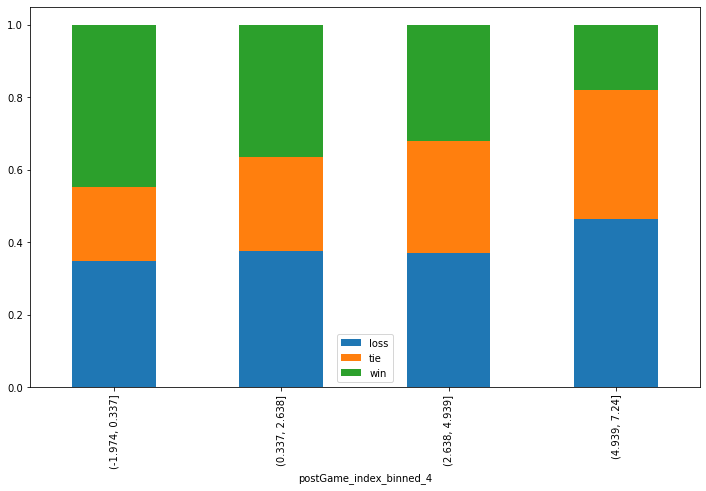

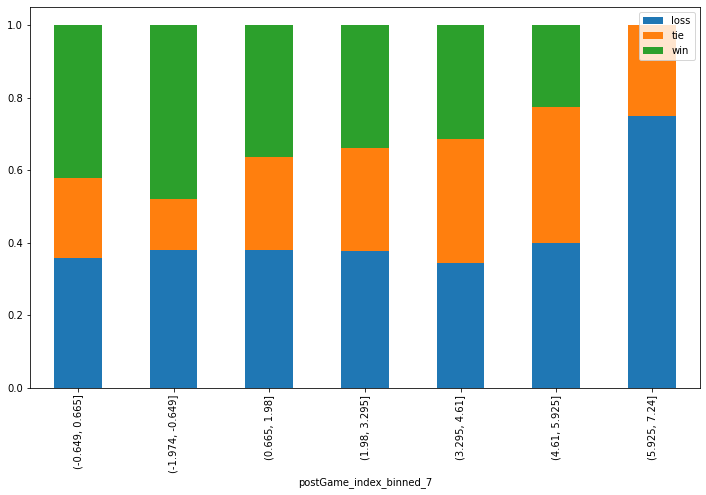

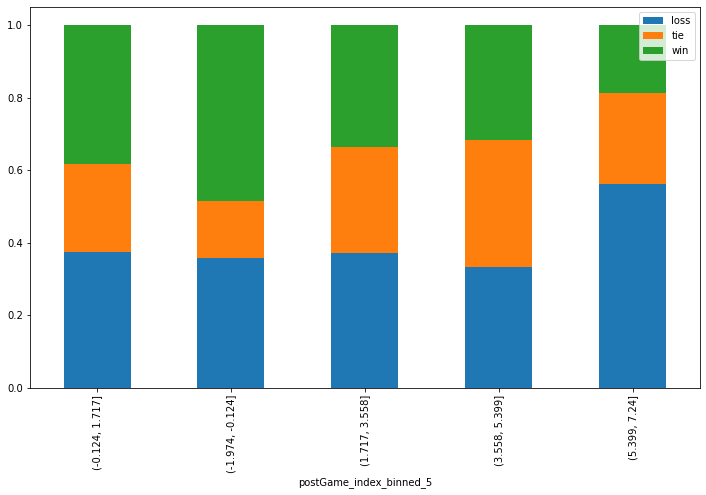

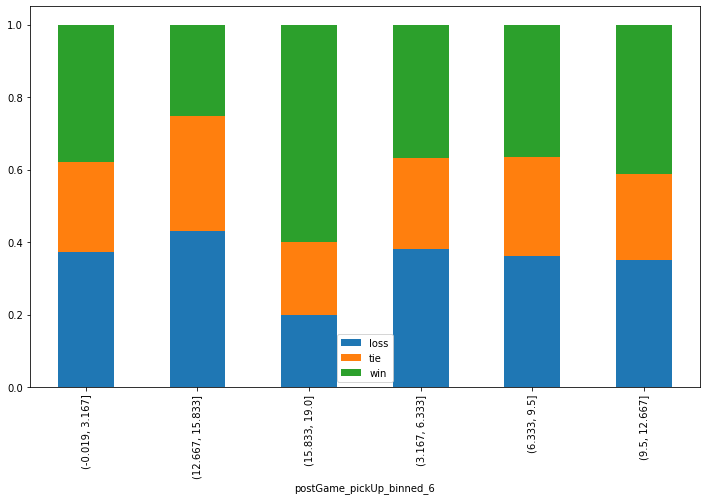

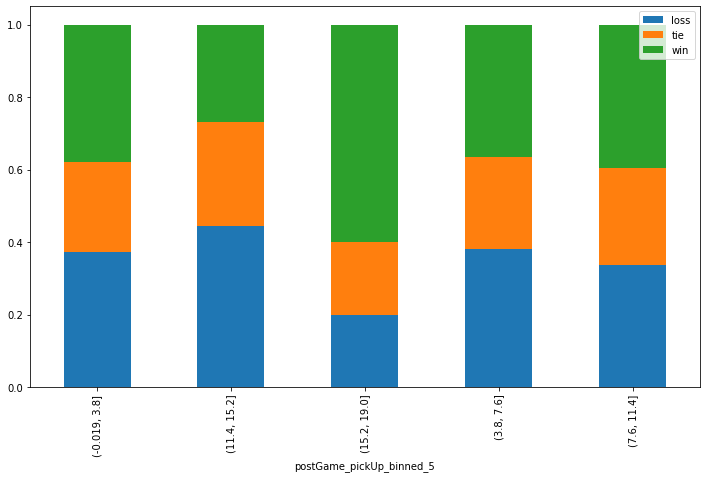

In [ ]:
binned_fp = list(filter(lambda z: 'binned' in z, player_nodes.columns.tolist()))
binned_gk = list(filter(lambda z: 'binned' in z, gk_nodes.columns.tolist()))
# Goalkeepers binned attributes from Part 2.d
for attr in binned_gk:
  variable_data = gk_nodes[attr]
  ax = pd.crosstab(
      variable_data, 
      gk_nodes_y['team_result'], normalize='index').plot.bar(stacked=True)
  fig = ax.get_figure()
  fig.set_facecolor('w')
  fig.set_size_inches(12, 7)
  ax.set_xlabel(attr)
  ax.legend(['loss', 'tie', 'win'])


In [ ]:
# Field players binned attributes from Part 2.d
for attr in binned_fp:
  variable_data = player_nodes[attr]
  ax = pd.crosstab(
      variable_data, 
      player_nodes_y['team_result'], normalize='index').plot.bar(stacked=True)
  fig = ax.get_figure()
  fig.set_facecolor('w')
  fig.set_size_inches(12, 7)
  ax.set_xlabel(attr)
  ax.legend(['loss', 'tie', 'win'])

In [ ]:
gk_nodes.columns

Index(['postGame_minPlayed_binned_6', 'postGame_minPlayed_binned_5',
       'postGame_minPlayed_binned_8', 'postGame_minPlayed_binned_4',
       'preGame_overall_binned_5', 'preGame_overall_binned_8',
       'preGame_overall_binned_6', 'preGame_overall_binned_3',
       'preGame_potential_binned_4', 'preGame_potential_binned_9',
       ...
       'postGame_index', 'postGame_pickUp', 'postGame_punch', 'postGame_save',
       'gameId', 'teamId', 'teamName', 'gameDate', 'nodeId', 'nodeName'],
      dtype='object', length=132)

## Section b

1
1
1


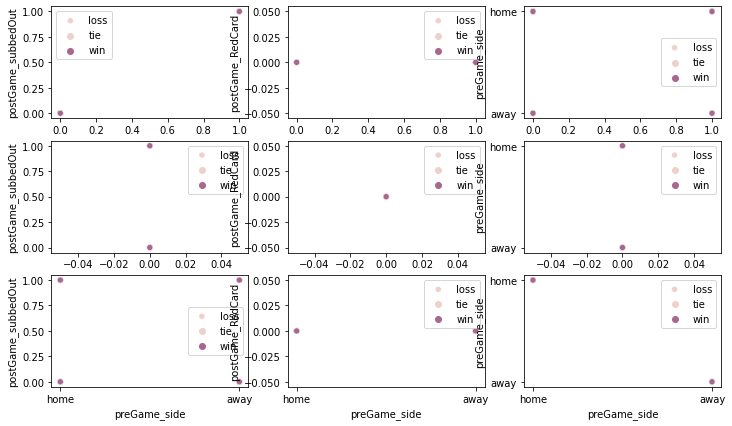

In [ ]:
# Field players discrete
fig, axs = plt.subplots(3, 3)
fig.set_facecolor('w')
fig.set_size_inches(12, 7)

for attr_x, row_ax in zip(discrete_attributes_fp[:3], axs):
  for attr_y, ax in zip(discrete_attributes_fp[:3], row_ax):
    if attr_x != attr_y or 1:
      # print(1)
      x = player_nodes_y[attr_x][:100]
      y = player_nodes_y[attr_y][:100]
      hue = player_nodes_y['team_result'][:100]
      sns.scatterplot(x=x, y=y, hue=hue, ax=ax)
      ax.set_xlabel(attr_x)
      ax.set_ylabel(attr_y)
      # ax.get_figure().set_facecolor('w')
      ax.legend(['loss', 'tie', 'win'])

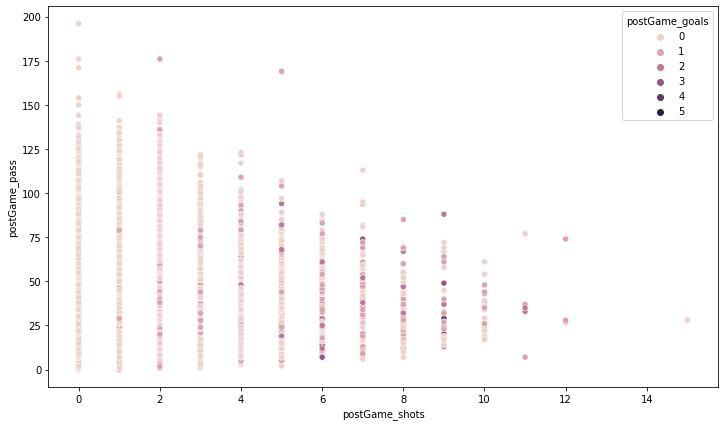

In [ ]:
ax = sns.scatterplot(
    x=player_nodes_y['postGame_shots'], 
    y=player_nodes_y['postGame_pass'], 
    hue=player_nodes_y['postGame_goals'],
    cmap="Oranges")
ax.get_figure().set_facecolor('w')
ax.get_figure().set_size_inches(12, 7)
# ax.legend(['loss', 'tie', 'win'])
# ax.get_figure().set_cmap(['green', 'white', 'red'])

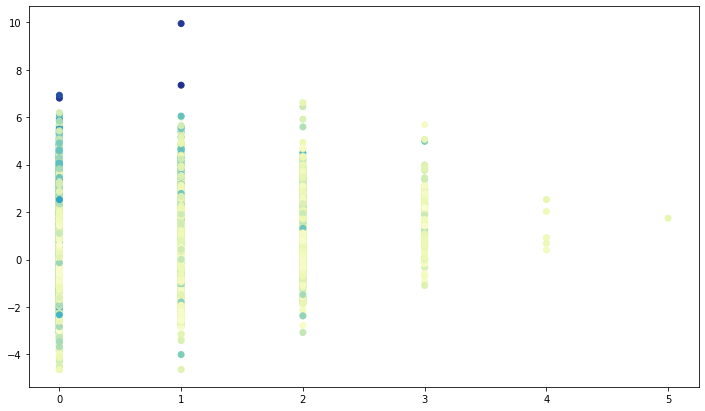

In [ ]:
plt.scatter(x=player_nodes_y['postGame_goals'], y=player_nodes_y['postGame_index'], c=player_nodes_y['postGame_pass']
                     , cmap='YlGnBu')
plt.gcf().set_facecolor('w')
plt.gcf().set_size_inches(12, 7)

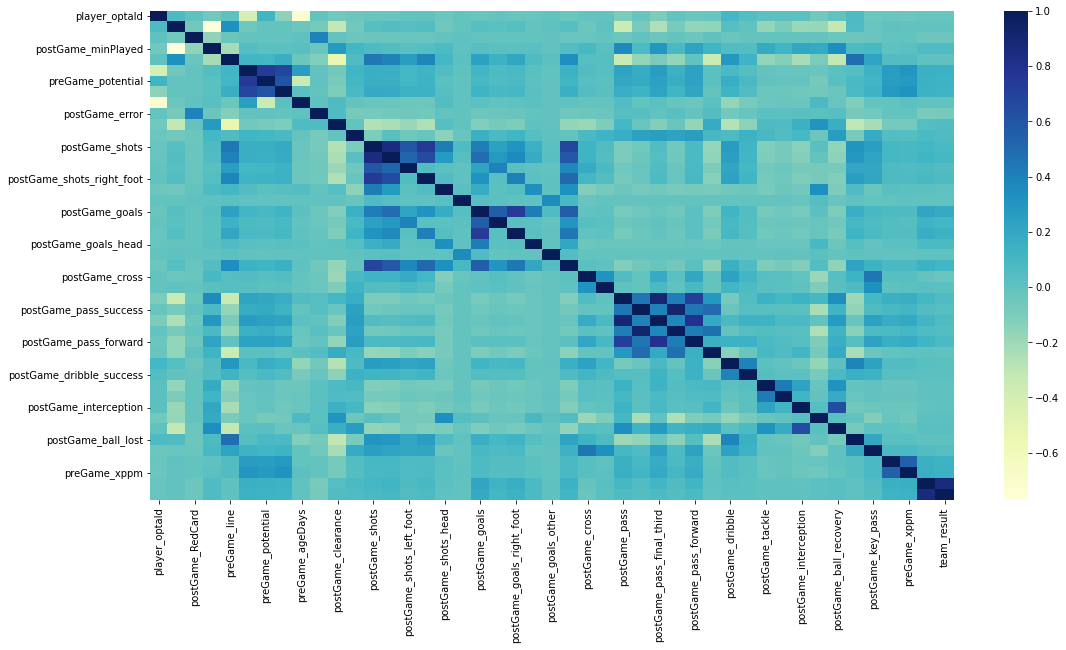

In [ ]:
ax = sns.heatmap(player_nodes_y.corr(), cmap='YlGnBu')
fig = ax.get_figure()
fig.set_facecolor('w')
fig.set_size_inches(18, 9)

## Section c

### Using the analysis from the predictive variables and the target variable, custom bins were derived with a focus on the predictability of each bin with regard to the target variable.

In [ ]:
fp_bins = {'preGame_overall': [48, 73, 94],
 'postGame_clearance': [0, 9, 15, 25],
 'postGame_shots': [0, 3, 10, 15],
 'postGame_shots_on_target': [0, 2, 6, 9],
 'postGame_shots_left_foot': [0, 2, 8, 10],
 'postGame_shots_right_foot': [0, 2, 8, 10],
 'postGame_goals': [0, 1, 2, 5],
 'postGame_goals_left_foot': [0, 1, 3],
 'postGame_goals_right_foot': [0, 1, 3],
 'postGame_dribble': [0, 10, 19],
 'postGame_tackle': [0, 8, 13],
 'postGame_interception': [0, 9, 13],
 'postGame_challenge': [0, 12, 24],
 'postGame_key_pass': [0, 6, 12],
 'preGame_xgpm': [-5.9, -4.8, -0.5, 3.8, 7],
 'preGame_xppm': [-1, 0, 1.1]}

gk_bins = {'preGame_overall': [51, 60, 80, 91],
 'preGame_potential': [57, 81, 94],
 'preGame_marketValueMilEuro': [0, 20, 60, 120],
 'preGame_xgpm': [-5.7, -3.7, -0.8, 4.2, 6.15],
 'preGame_xppm': [-0.75, 0.2, 1.1],
 'postGame_clearance': [0, 5, 9],
 'postGame_index': [-2, -1, 5.7, 7.3],
 'postGame_pickUp': [0, 14, 19],
 'postGame_punch': [0, 3, 5],
 'postGame_save': [0, 11, 17],
}
 

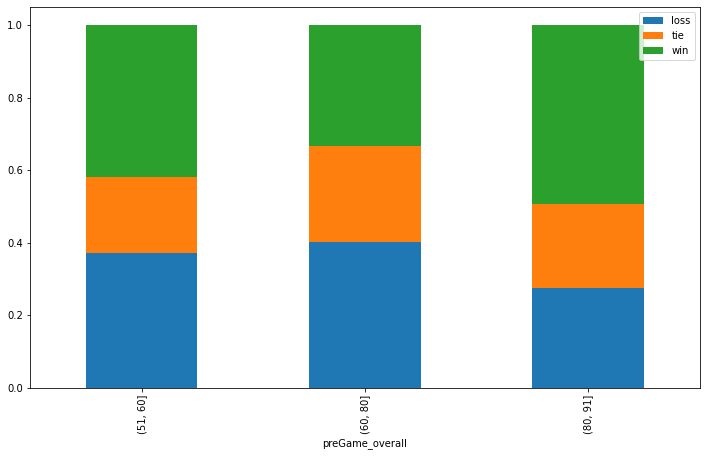

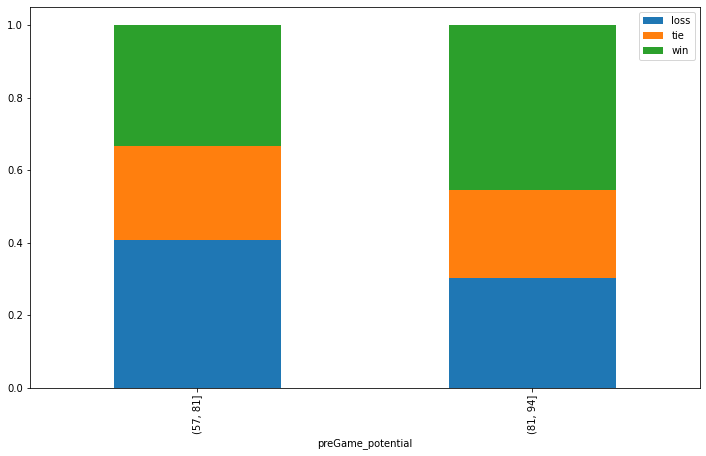

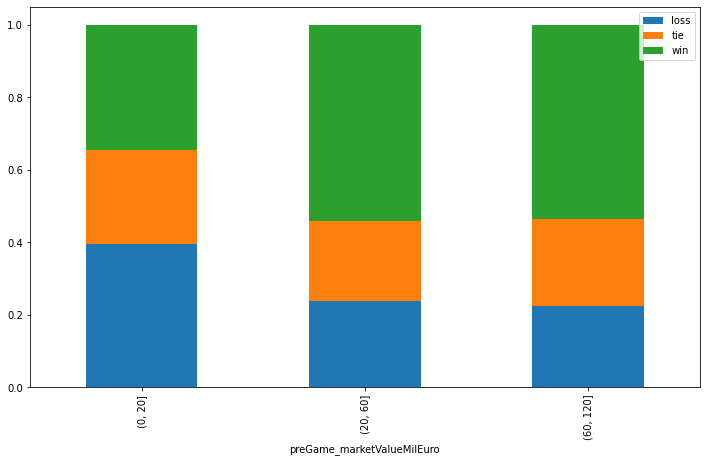

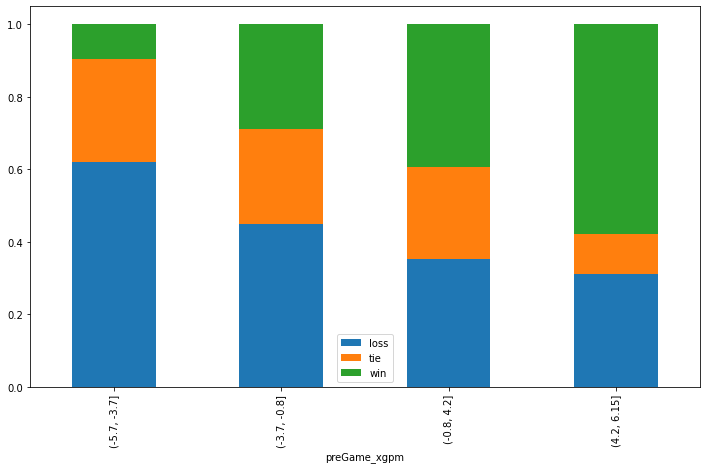

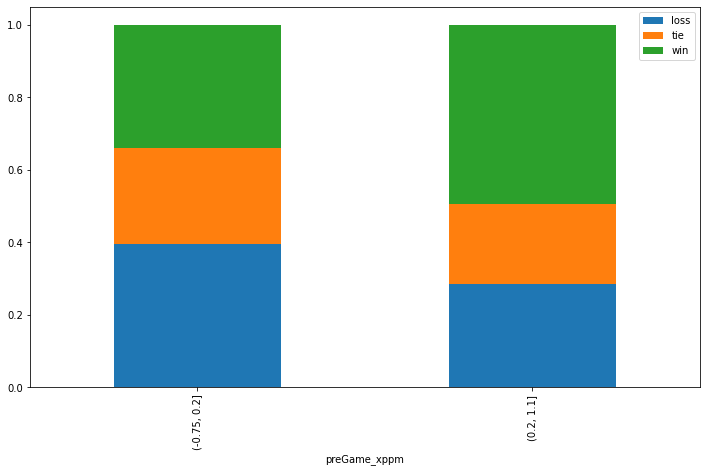

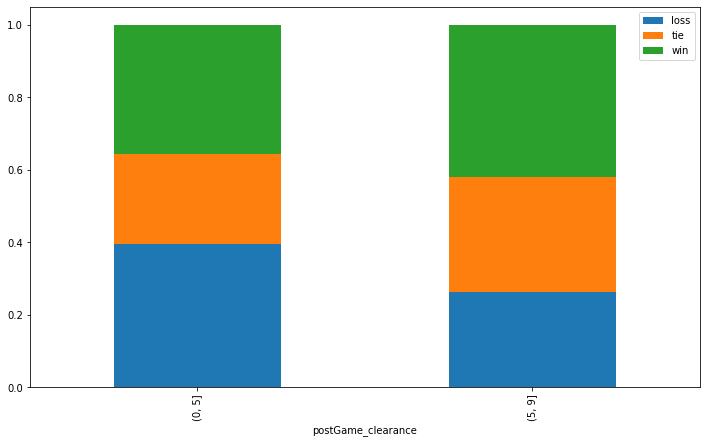

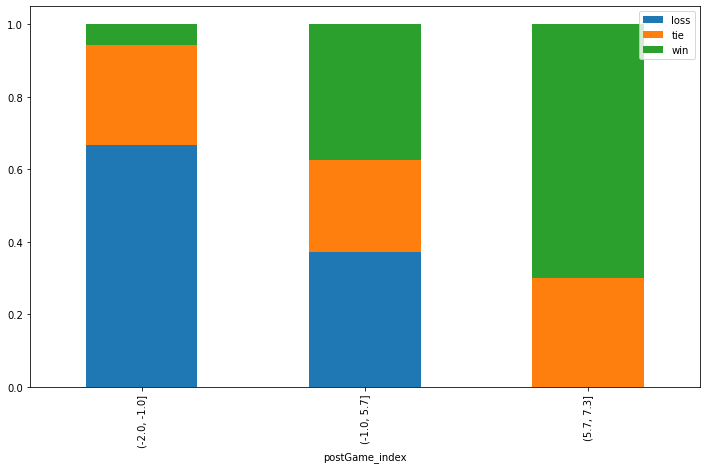

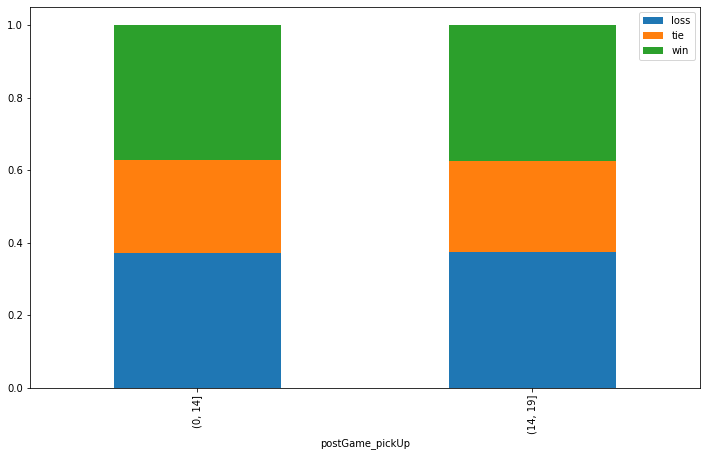

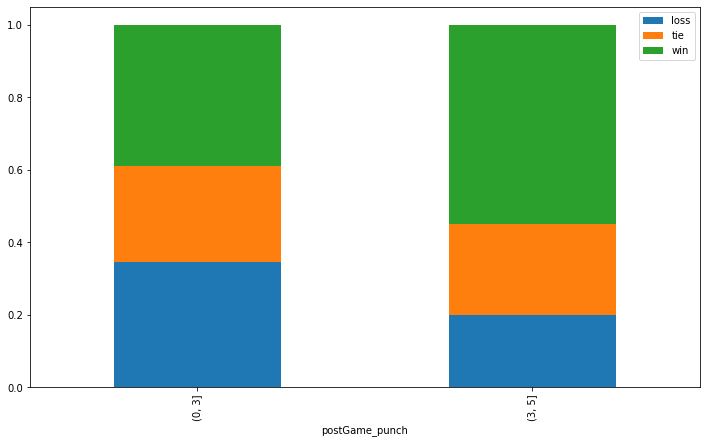

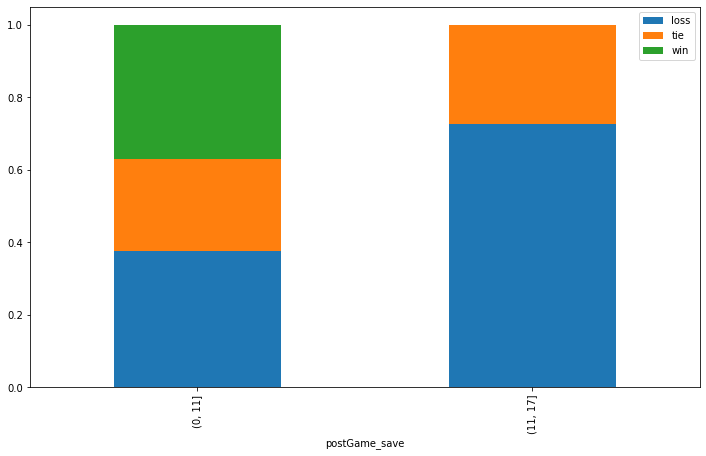

In [ ]:
# Goalkeeper attributes
for attr, bins in gk_bins.items():
  variable_data = gk_nodes_y[attr]
  ax = pd.crosstab(
      pd.cut(gk_nodes_y[attr].values.reshape(-1), bins=bins), 
      gk_nodes_y['team_result'], normalize='index').plot.bar(stacked=True)
  fig = ax.get_figure()
  fig.set_facecolor('w')
  fig.set_size_inches(12, 7)
  ax.set_xlabel(attr)
  ax.legend(['loss', 'tie', 'win'])

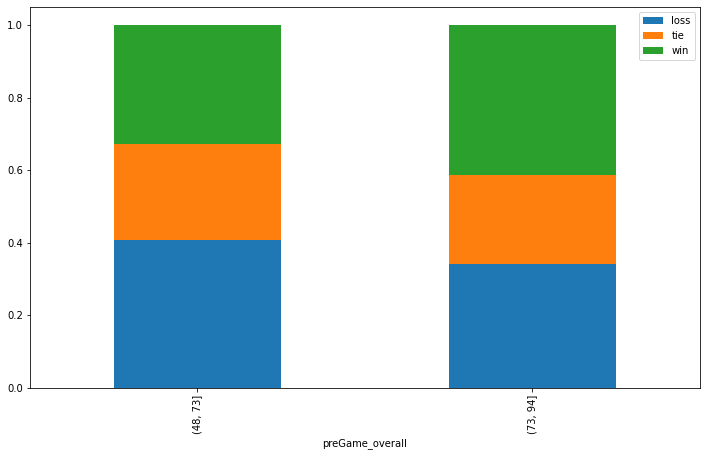

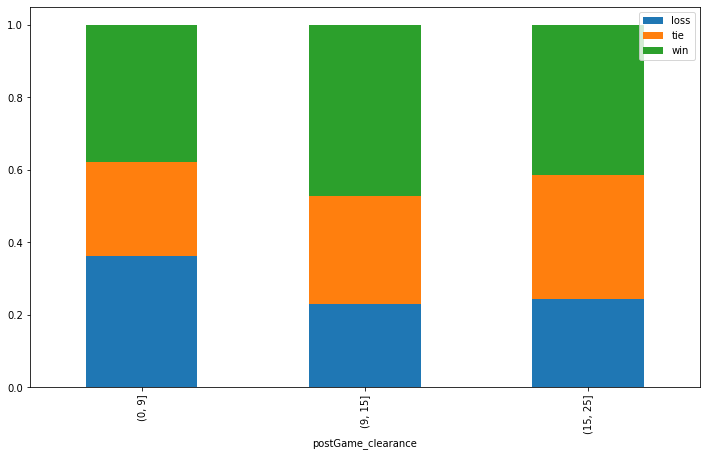

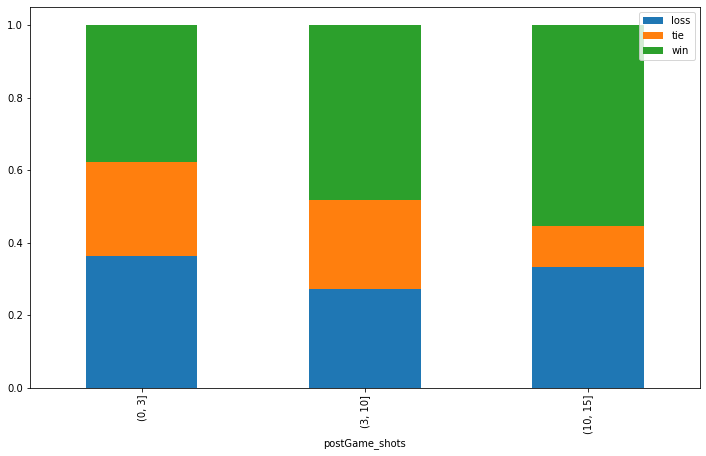

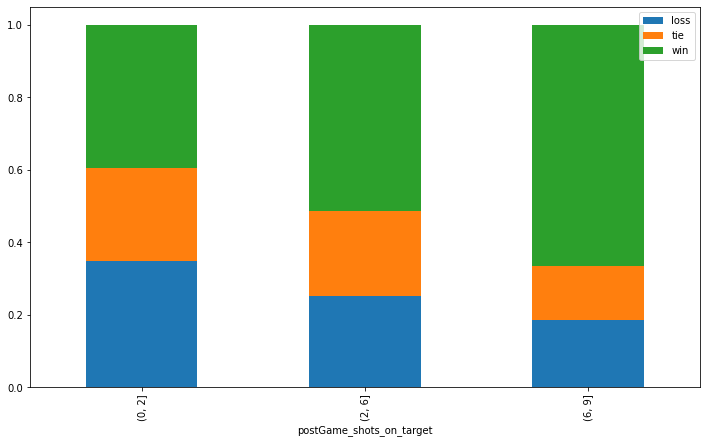

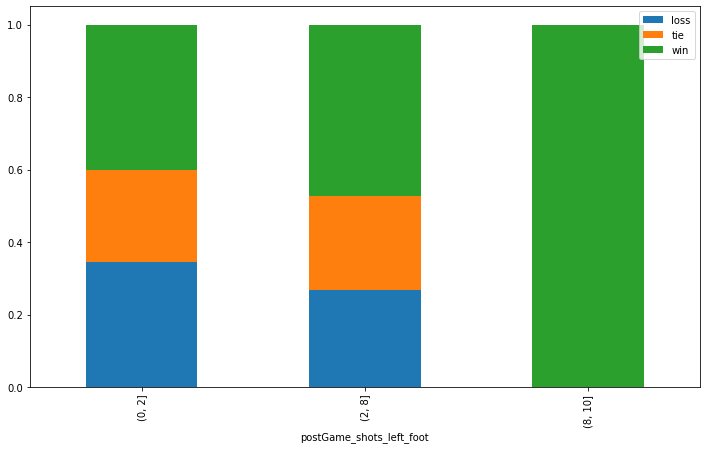

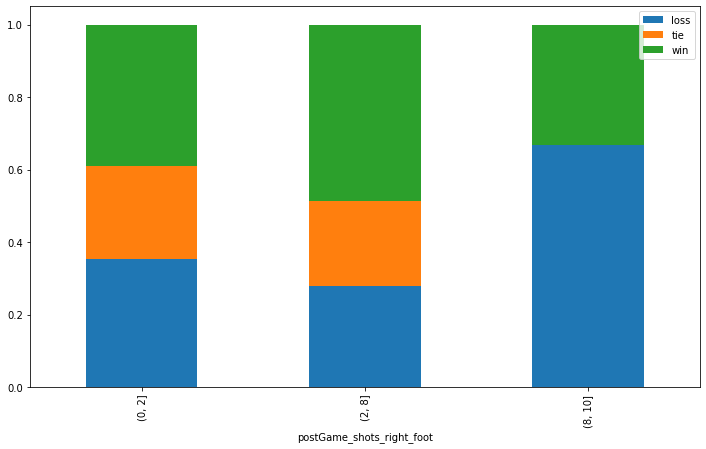

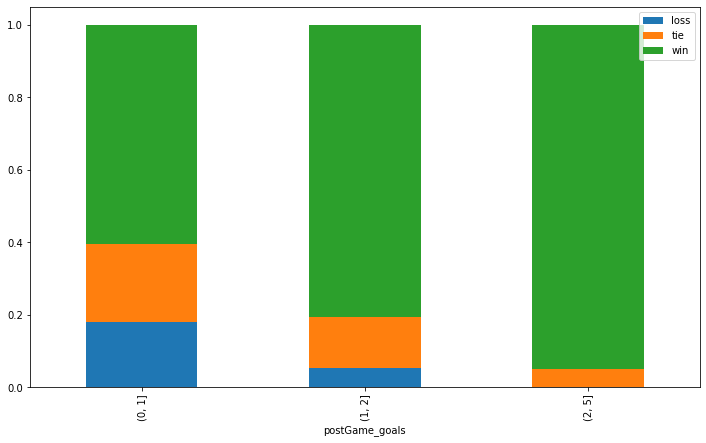

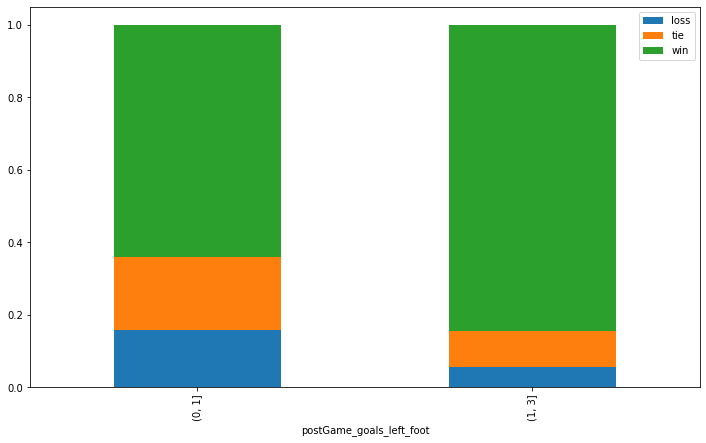

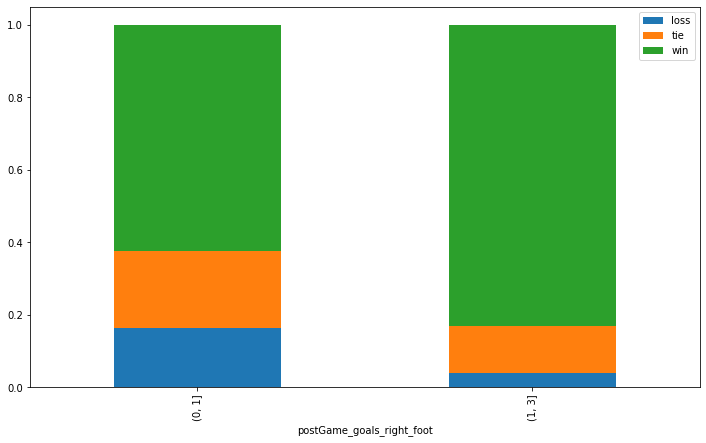

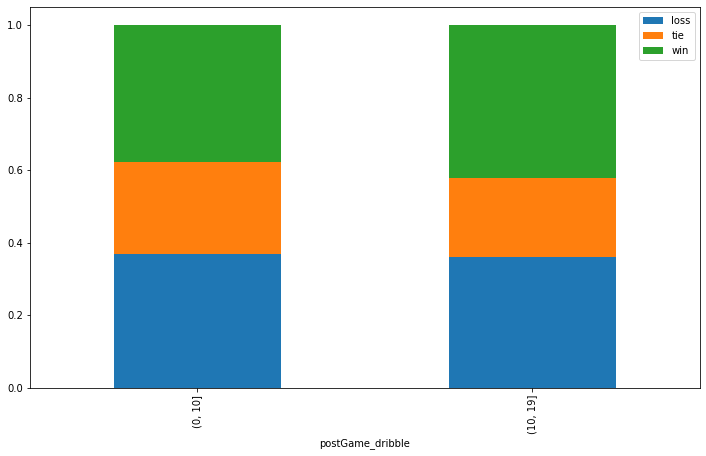

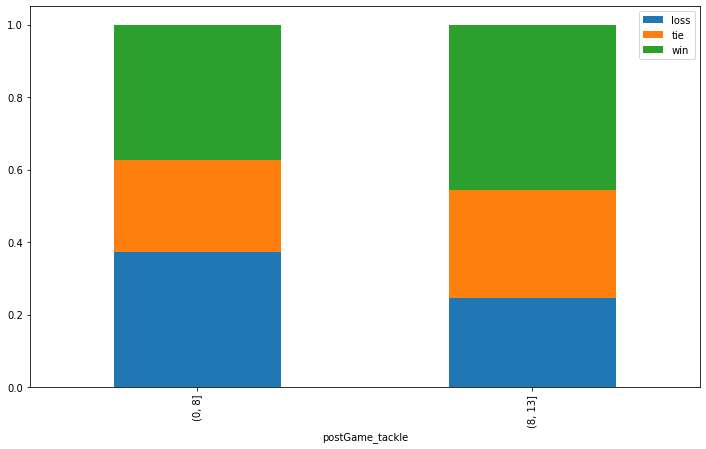

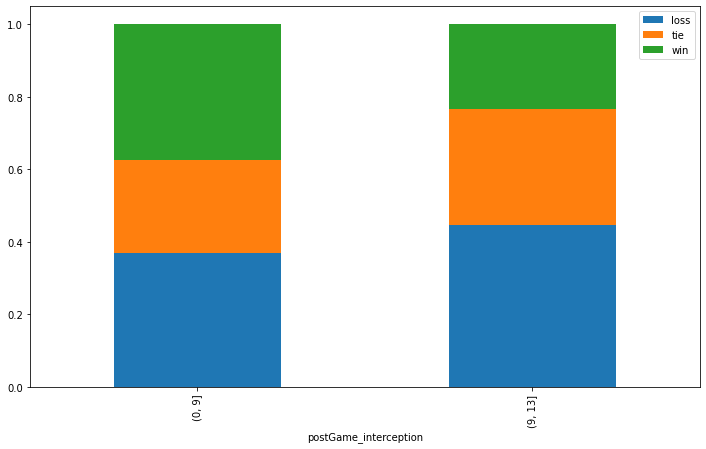

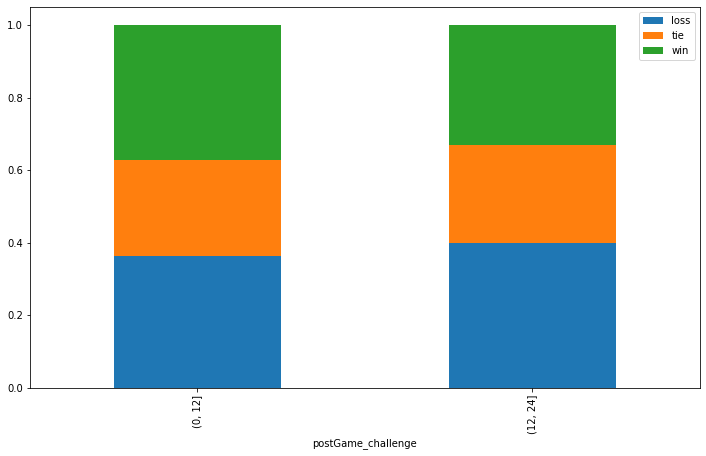

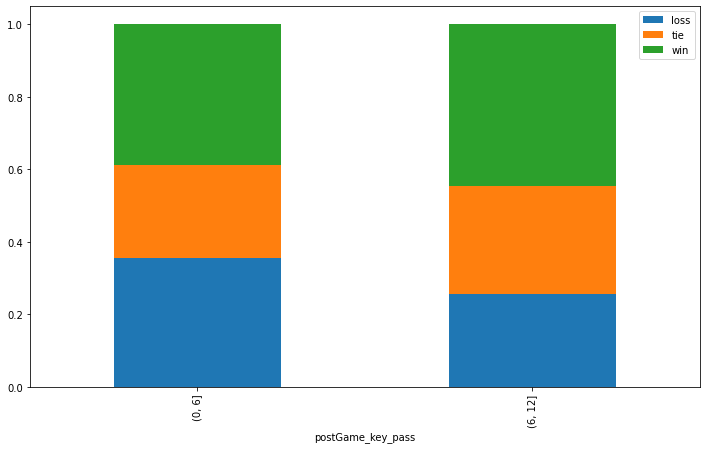

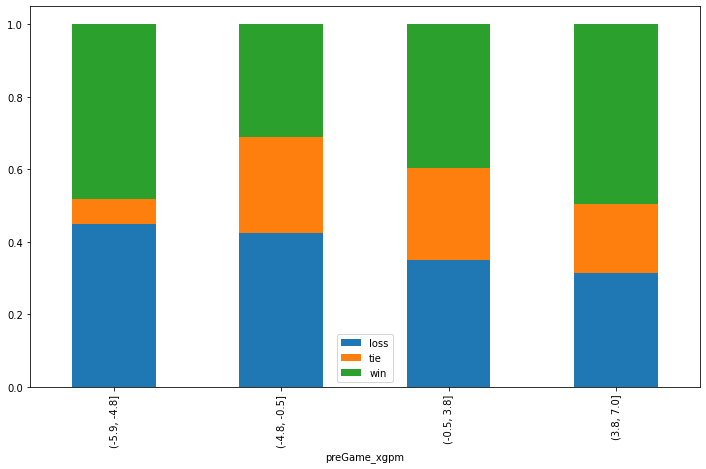

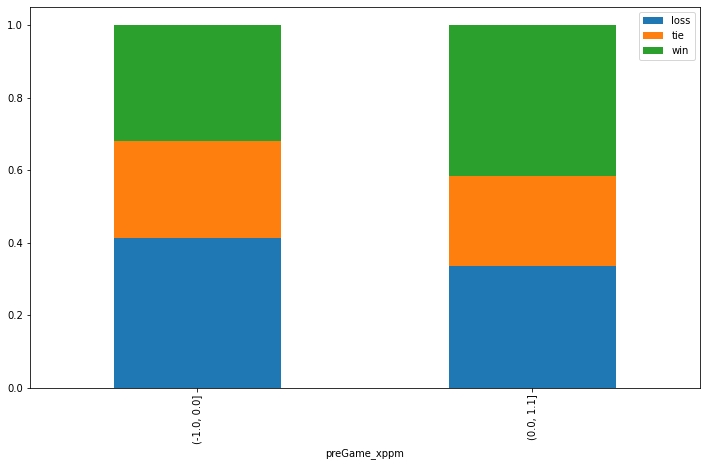

In [ ]:
# Field players attributes
for attr, bins in fp_bins.items():
  variable_data = player_nodes_y[attr]
  ax = pd.crosstab(
      pd.cut(player_nodes_y[attr].values.reshape(-1), bins=bins), 
      player_nodes_y['team_result'], normalize='index').plot.bar(stacked=True)
  fig = ax.get_figure()
  fig.set_facecolor('w')
  fig.set_size_inches(12, 7)
  ax.set_xlabel(attr)
  ax.legend(['loss', 'tie', 'win'])

## Section d

### As explained earlier in the problem understanding phase, the post-game attributes are not available prior to a match taking place. However, by using a window of the values of these attributes accross previous matches, a rich attribute could be derived. Each player's performance in the last 4 matches has been averaged over to provide these attributes.

In [ ]:
player_nodes = pd.read_csv('Field_player_nodes.csv')

In [ ]:
# Field players
query = "select "
_columns = ['player_optaId', 'postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'playerId', 'name', 'postGame_positions',
       'preGame_overall', 'preGame_potential', 'preGame_marketValueMilEuro',
       'preGame_preferredFoot', 'preGame_ageDays', 'gameId', 'preGame_xgpm', 'preGame_xppm', 'teamId',
       'teamName', 'gameDate', 'nodeId', 'nodeName']
post_columns = [
    'postGame_error',
       'postGame_clearance', 'postGame_index', 'postGame_shots',
       'postGame_shots_on_target', 'postGame_shots_left_foot',
       'postGame_shots_right_foot', 'postGame_shots_head',
       'postGame_shots_other', 'postGame_goals', 'postGame_goals_left_foot',
       'postGame_goals_right_foot', 'postGame_goals_head',
       'postGame_goals_other', 'postGame_xG', 'postGame_cross',
       'postGame_cross_success', 'postGame_pass', 'postGame_pass_success',
       'postGame_pass_final_third', 'postGame_pass_final_third_success',
       'postGame_pass_forward', 'postGame_pass_forward_success',
       'postGame_dribble', 'postGame_dribble_success', 'postGame_tackle',
       'postGame_tackle_success', 'postGame_interception',
       'postGame_challenge', 'postGame_ball_recovery', 'postGame_ball_lost',
       'postGame_key_pass',
    ]
for column in _columns:
    q_plus = f"""
        {column},
    """
    query += q_plus
for i, column in enumerate(post_columns):
    try:
        post_columns[i+1]
        sep = ',' 
    except IndexError:
        sep = ''
    q_plus = f"""
                {column},
                avg({column}) over (
                    partition by player_optaId
                    order by gameDate
                    rows between 4 preceding
                    and 1 preceding
                ) 
                 as agg_{column}{sep}   
            """
    query += q_plus

query += """
    from player_nodes outerP
    order by gameDate, gameId, teamName
"""
fp_post_features = ps.sqldf(query)
fp_post_features.to_csv('field_players_plus_features.csv')
fp_post_features

In [ ]:
gk_nodes = pd.read_csv('GK_nodes.csv')

In [ ]:
query = "select "
_columns = ['name', 'nodeName', 'player_optaId', 'postGame_subbedOut', 'postGame_RedCard',
       'postGame_minPlayed', 'preGame_side', 'preGame_line',
       'preGame_position', 'playerId', 'preGame_overall',
       'preGame_potential', 'preGame_marketValueMilEuro',
       'preGame_preferredFoot', 'preGame_ageDays', 'preGame_xgpm',
       'preGame_xppm','gameId', 'teamId', 'teamName', 'gameDate', 'nodeId']
post_columns = [
    'postGame_error', 'postGame_clearance',
    'postGame_index', 'postGame_pickUp', 'postGame_punch', 'postGame_save'
    ]
for column in _columns:
    q_plus = f"""
        {column},
    """
    query += q_plus
for i, column in enumerate(post_columns):
    try:
        post_columns[i+1]
        sep = ',' 
    except IndexError:
        sep = ''
    q_plus = f"""
                {column},
                avg({column}) over (
                    partition by player_optaId
                    order by gameDate
                    rows between 4 preceding
                    and 1 preceding
                ) 
                 as agg_{column}{sep}   
            """
    query += q_plus

query += """
    from gk_nodes outerGK
    order by gameDate, gameId, teamName
"""
gk_features = ps.sqldf(query)
gk_features.to_csv('goal_keepers_plus_features.csv')
gk_features